# MOVILIDAD INTERGENERACIONAL EDUCATIVA EN ARGENTINA (2021-2022)
Autor: Lucila Chirino Martín

---

# Índice

1. Análisis del conjunto de datos de la Encuesta Permanente de Hogares de Argentina

    1.1. Descripción
    
    1.2. Audiencia
    
    1.3. Objetivo
    
    1.4. Preguntas generales a resolver
    
    1.5. Contexto analítico

    1.6. Data Adquisition
    
    
2. Importación de datos y librerías


3. Feature Engineering

    3.1.Data Wrangling

    3.1.1. Filtrado de variables I
    
    3.1.2. Fusión de dataframes
    
    3.1.3. Eliminación de registros irrelevantes para el análisis
    
    3.1.4. Feature Creation
    
    3.1.5. Verificación de datos ausentes
    
    3.1.6. Verificación de datos duplicados
    
    3.1.7. Transformaciones
    
    3.1.8.  Filtrado de variables II

    3.2. Análisis Exploratorio de Datos (EDA)

    3.2.1. Información general sobre el conjunto de datos
    
    3.2.2. Análisis por medio de gráficos
        
        3.2.2.1. Análisis univariado
        
        3.2.2.2. Análisis bivariado
        
        3.2.2.3. Análisis multivariado
        
    3.2.5. Análisis específicos para responder a las preguntas de investigación
    
    3.2.6. Conclusiones del EDA
    
    
4. Selección de features

    4.1. Forward selection
    
    4.2. Backward selection
    
    4.3. Stepwise selection
    
    
5. Aprendizaje supervisado: Entrenamiento y testeo de un modelo de Machine Learning

    5.1. División de datos
    
    5.2 Entrenamiento y evaluación del modelo de regresión
    
        5.2.1. Entrenamiento: regresión y métricas de evaluación
        
        5.2.2. Testeo: regresión y métricas de evaluación
        
    5.3. Árbol de decisión para regresión
    
    5.4. Conclusiones de los modelos
   
    5.4.1. Conclusiones del modelo de regresión
   
    5.4.2. Conclusiones del modelo de Árbol de Decisión para regresión
    
    
    
6.  Aprendizaje supervisado: Modelo de Clasificación
    
    6.1. División de datos
   
    6.2. Evaluación del modelo de clasificación
    
    6.3. Conclusiones
    
7. Aprendizaje no supervisado: Análisis de Componentes principales (PCA)


8. Conclusión

    8.1. Resultados obtenidos y evaluación de los distintos modelos de Machine Learning

    8.2. Respuestas a las preguntas planteadas
---


# 1. Análisis del conjunto de datos de la Encuesta Permanente de Hogares de Argentina


## 1.1. Descripción

Este proyecto busca realizar un análisis de los datos de la Encuesta Permanente de Hogares (EPH) de Argentina. En él se explorará este conjunto de datos para analizar *las características de la Movilidad Educativa Intergeneracional (MEI) en Argentina*, entendida como los vínculos existentes entre el máximo nivel educativo alcanzado por los padres y los que alcanzan sus hijos.

La motivación de este análisis radica en que la educación es fundamental en la vida de las personas, especialmente en la actualidad en donde una persona para insertarse en el mundo laboral debe haber completado al menos la secundaria. Por lo que, es de gran importancia analizar cuáles son los factores que determinan el máximo nivel educativo alcanzado por una persona y si este depende de la educación que recibieron sus padres. Además, la educación juega un doble papel en la transmisión intergeneracional del status socioeconómico. Por un lado, es una importante vía de movilidad social para hombres y mujeres que pertenecen a los estratos sociales más bajos, los cuales no heredaron privilegios. Por otro lado, la educación contribuye a la transmisión de la desigualdad entre generaciones, dado que se distribuye de forma desigual entre los diferentes estratos.

Por otra parte, la educación es una herramienta de política clave tanto a nivel micro como macroeconómico. En el plano individual, educarse mejora los ingresos de las personas y, por tanto, su calidad de vida; en el plano social, permite no sólo la igualación de oportunidades y de resultados en el mercado laboral que reduce la inequidad distributiva, sino también potencia el bienestar general de la sociedad a través de incrementos de productividad que mejoran la eficiencia económica. Por lo tanto, el análisis de la MEI es clave para los agentes políticos a la hora de tomar decisiones relacionadas a la educación de la sociedad.


## 1.2. Audiencia

Este estudio está dirigido al Gobierno y a sus diferentes agentes dado que es relevante, desde el punto de vista económico,  político y social, investigar sobre la movilidad entre generaciones, especialmente la movilidad educativa, ya que sirve como un instrumento para la toma de decisiones.


## 1.3. Objetivo

El **objetivo principal** de esta investigación es predecir si un hijo experimentará MEI por medio de modelos de machine learning. 

## 1.4. Preguntas generales a resolver

Algunas preguntas específicas que buscamos responder son:

* ¿Cuántos padres e hijos completaron cada nivel educativo?

* ¿Cuáles son los factores que influyen en el nivel educativo de una persona?

* ¿Existe una relación entre el nivel educativo alcanzado por un hijo y el de sus padres? En caso de que exista una relación, ¿cómo es esa relación?

* ¿El nivel educativo del jefe o jefa de hogar tienen la misma relación con el nivel educativo alcanzado por el hijo?

* ¿Cuál fue *la movilidad educativa intergeneracional* de Argentina en los años 2021-2022?


Para dar respuesta a estas preguntas se realizará un análisis exploratorio de los datos. Posteriormente se creará un modelo predictivo.




## 1.5. Contexto analítico

Como se mencionó anteriormente, para realizar este estudio se utilizará la EPH, que es un programa nacional de producción permanente de indicadores sociales cuyo objetivo es conocer las características sociodemográficas y socioeconómicas de la población. Se realiza en forma conjunta por el INDEC y las Direcciones Provinciales de Estadística.



## 1.6. Data Adquisition


Los datos utilizados en el análisis se obtienen mediante la **Encuesta Permanente de Hogares (EPH)** realizada por el Instituto Nacional de Estadísticas y Censos (INDEC) de la República Argentina. La EPH permite conocer las características sociodemográficas y socioeconómicas de la población argentina y está dividida en la *Base Hogares*, que contiene información sobre el hogar, y la *Base Personas*, que contiene datos sobre los individuos del hogar. En este trabajo sólo se utilizará la **_Base Personas (usu_individual.txt)_** para todos los trimestres de los años 2021 y 2022 donde los miembros de un mismo hogar tienen el mismo CODUSU y NRO_HOGAR pero se diferencian por el número de COMPONENTE.


Las columnas de la base de datos de interés para esta investigación son las siguientes:

* **CODUSU**: Código para distinguir viviendas: permite aparear hogares y personas. Además, permite realizar el seguimiento de hogares y personas a través de los trimestres

* **NRO_HOGAR**: Código para distinguir hogares. Permite aparear hogares y personas.

* **COMPONENTE**: Número de componente: Nº de orden que se asigna a las personas que conforman cada hogar de la vivienda (Casos especiales: 51 = Servicio doméstico en hogares, 71 = Pensionistas en hogares )

* **ANO4**: Año de relevamiento (4 dígitos)

* **TRIMESTRE**: Número de trimestre

* **PONDERA**: Ponderación

* **REGION**: Código de Región (1 = Gran Buenos Aires, 40 = NOA, 41 = NEA, 42 = Cuyo, 43 = Pampeana, 44 = Patagónica)

* **CH03**:Relación de parentesco

* **CH04** : Sexo

* **CH06**: Edad en años cumplidos

* **CH12**: ¿Cuál es el nivel más alto que cursa o cursó?

* **CH13**: ¿Finalizó ese nivel?

* **CH14**: ¿Cuál fue el último año que aprobó?

* **NIVEL_ED**: Nivel educativo

* **ESTADO**: Condición de actividad

* **CAT_OCUP**: Categoría ocupacional (para ocupados y desocupados con ocupación anterior)

* **CAT_INAC**: Categoría de inactividad

* **P21**: Monto de ingreso de la ocupación principal percibido en ese mes

* **P47T**: Monto total de ingreso individual percibido en ese mes (sumatoria ingresos laborales y no laborales)

* **ITF**: Monto total de ingreso familiar percibido en ese mes

Los valores de las variables categóricas se pueden observar en la siguiente tabla:

|ÍNDICE|CH03|CH04|CH12|CH13|CH14|NIVEL_ED|ESTADO|CAT_OCUP|CAT_INAC|
|------|----|----|----|----|----|--------|------|--------|--------|
|00|-|-|-|-|Ninguno|-|Entrevista individual no realizada (no respuesta al Cuestionario Individual)|-|-|
|01|Jefe/a|Varón|Jardín/ Preescolar|Sí|Primero|Primaria Incompleta (incluye educación especial)|Ocupado|Patrón|Jubilado / Pensionado|
|02|Cónyuge / Pareja|Mujer|Primario|No|Segundo|Primaria Completa|Desocupado|Cuenta propia|Rentista|
|03|Hijo / Hijastro/a|-|EGB|-|Tercero|Secundaria Incompleta|Inactivo|Obrero o empleado|Estudiante|
|04|Yerno / Nuera|-|Secundario|-|Cuarto|Secundaria Completa|Menor de 10 años|Trabajador familiar sin remuneración|Ama de casa|
|05|Nieto/a|-|Polimodal|-|Quinto|Superior Universitaria Incompleta|-|-|Menor de 6 años|
|06|Madre / Padre|-|Terciario|-|Sexto|Superior Universitaria Completa|-|-|Discapacitado|
|07|Suegro/a|-|Universitario|-|Séptimo|Sin instrucción|-|-|Otros|
|08|Hermano/a|-|Posgrado Univ|-|Octavo|-|-|-|-|
|09|Otros Familiares|-|Educación especial (discapacitado)|Ns./Nr.|Noveno|Ns/Nr|-|Ns/Nr|-|
|10|No Familiares|-|-|-|-|-|-|-|



---
# 2. Importación de librerías y datos

In [1]:
# Importamos las bibliotecas para manipulación de datos y visualización
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics
from statistics import mode
from pandas import read_csv

# Importamos las bibliotecas para el modelado y aprendizaje automático
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SequentialFeatureSelector2
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Importamos bibliotecas para obtener métricas de los modelos
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Importamos una biblioteca para la selección de features
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    pvals = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
            pvals.append(new_pval.min())
            print(best_features, new_pval.min())
        else:
            break
    return best_features, pvals

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    worst_features = []
    pvals = []
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        print(features, p_values.min())
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            worst_features.append(excluded_feature)
            pvals.append(p_values.max())
        else:
            break
    return features, worst_features, pvals

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            print(best_features, new_pval.min())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                    print(best_features, p_values.max())

                else:
                    break
        else:
            break
    return best_features,

# Importamos una biblioteca para hacer un análisis de los datos faltantes
import missingno as msno
%matplotlib inline

# Importamos una biblioteca para configurar los warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [18]:
# Cargamos las bases de datos

# EPH 2021 completa
eph121 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T121.txt',sep=';', low_memory=False)
eph221 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T221.txt',sep=';', low_memory=False)
eph321 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T321.txt',sep=';', low_memory=False)
eph421 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T421.txt',sep=';', low_memory=False)


# EPH 2022 completa
eph122 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T122.txt',sep=';', low_memory=False)
eph222 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T222.txt',sep=';', low_memory=False)
eph322 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T322.txt',sep=';', low_memory=False)
eph422 = pd.read_csv('https://raw.githubusercontent.com/LucilaChi23/DataScience/main/usu_individual_T422.txt',sep=';', low_memory=False)

# 3. Feature Engineering


## 3.1. Data Wrangling

## 3.1.1. Filtrado de variables I


In [4]:
# Filtramos las variables que son de interés
eph121 = eph121.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])
eph221 = eph221.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])
eph321 = eph321.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])
eph421 = eph421.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])


eph122 = eph122.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])
eph222 = eph222.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])
eph322 = eph322.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])
eph422 = eph422.filter(['CODUSU','NRO_HOGAR','COMPONENTE', 'ANO4','TRIMESTRE','REGION','CH03','CH04','CH06','CH12','CH13','CH14','PONDERA','P21','P47T','ITF','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC'])

## 3.1.2. Fusión de dataframes

Ahora unimos las bases de datos de todos los trimestres del año 2021 y 2022 con el comando **pd.concat()** y las renombramos como *eph21* y *eph22* respectivamente. Luego, unimos las bases de los años 2021 y 2022 y la renombramos como *eph*.

In [5]:
# Unimos las bases de datos
eph21 = pd.concat([eph121,eph221, eph321, eph421], ignore_index=True)
eph22 = pd.concat([eph122,eph222, eph322, eph422], ignore_index=True)

eph = pd.concat([eph21,eph22], ignore_index=True)

## 3.1.3. Eliminación de registros irrelevantes para el análisis

 Eliminamos de la base de datos, a través de la función **df.drop()**, todas las relaciones de parentezco (variable CH03), dejando solamente a Jefes/as de Hogar y a los Hijos/as/Hijastros, y también eliminamos los casos de no respuesta. Además, acotaremos el análisis a la población de entre 25 y 65 años, ya que la edad promedio en la que una persona finaliza la Universidad suele ser 26 años.

In [6]:
eph = eph.drop(eph[eph.CH06 < 25].index)      #Eliminamos a los menores de 25 años
eph = eph.drop(eph[eph.CH06 > 65].index)      #Eliminamos a los mayores de 65 años

eph = eph.drop(eph[eph.CH12==9].index)        #Eliminamos a los que recibieron Educación Especial
eph = eph.drop(eph[eph.CH14==98].index)       #Eliminamos a los que recibieron Educación Especial
eph = eph.drop(eph[eph.CH12==9]. index)       #Elinimamos a los que recibieron Educacion Especial
eph = eph.drop(eph[eph.CH13==9].index)        #Eliminamos a los que respondieron Ns./Nr.
eph = eph.drop(eph[eph.CH14==99].index)       #Eliminamos a los que respondieron Ns./Nr.
eph = eph.drop(eph[eph.NIVEL_ED==9].index)    #Eliminamos a los que respondieron Ns./Nr.

eph = eph.drop(eph[eph.CH03==2]. index)       #Eliminamos al conyuge/pareja
eph = eph.drop(eph[eph.CH03==4]. index)       #Eliminamos al yerno/nuera
eph = eph.drop(eph[eph.CH03==5]. index)       #Eliminamos al nieto/a
eph = eph.drop(eph[eph.CH03==6]. index)       #Eliminamos al padre/madre
eph = eph.drop(eph[eph.CH03==7]. index)       #Eliminamos al suegro/suegra
eph = eph.drop(eph[eph.CH03==8]. index)       #Eliminamos al hermano/a
eph = eph.drop(eph[eph.CH03==9]. index)       #Eliminamos a otros familiares
eph = eph.drop(eph[eph.CH03==10]. index)      #Eliminamos a no familiares

In [7]:
# Visualizamos la base de datos
eph

,CODUSU,NRO_HOGAR,COMPONENTE,ANO4,TRIMESTRE,REGION,CH03,CH04,CH06,CH12,CH13,CH14,PONDERA,P21,P47T,ITF,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC
0,TQRMNOPPQHLKLMCDEFIAH00646702,1,1,2021,1,43,1,2,27,7,1,NaN,675,40000.0,40000.0,40000.0,6,1,3,0
1,TQRMNOPPRHLKLMCDEFIAH00665104,1,1,2021,1,43,1,2,26,7,2,4.0,675,0.0,25000.0,25000.0,5,3,0,3
2,TQRMNOPPRHMOLQCDEFIAH00701809,1,1,2021,1,43,1,1,38,4,2,3.0,559,30000.0,-9.0,0.0,3,1,3,0
7,TQRMNOPPSHLKLMCDEFIAH00646637,1,1,2021,1,43,1,1,25,7,1,NaN,538,-9.0,-9.0,0.0,6,1,3,0
9,TQRMNOPPSHMOLQCDEFIAH00698759,1,1,2021,1,43,1,2,49,2,2,6.0,479,17000.0,17000.0,17000.0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390675,TQRMNORRRHMNKSCDEIOAH00708993,1,1,2022,4,43,1,2,34,4,1,NaN,130,0.0,5500.0,135500.0,4,3,0,4
390679,TQRMNOQSVHLMKMCDEIKAH00719785,1,1,2022,4,43,1,1,38,4,2,3.0,1095,130000.0,130000.0,130000.0,3,1,3,0
390683,TQRMNOPPUHLMKNCDEIKAH00719786,1,1,2022,4,43,1,1,38,7,1,NaN,949,120000.0,-9.0,0.0,6,1,2,0
390686,TQRMNOQSXHLMKNCDEIKAH00781064,1,1,2022,4,43,1,1,48,4,1,NaN,702,0.0,0.0,0.0,4,2,3,0


## 3.1.4. Feature Creation

Creamos la variable **EducHijos** para conocer la cantidad de años de educación formal de los hijos. Luego crearemos las variables **EducPadres**, **EducJefe** y **EducJefa** las cuales mostrarán la cantidad de años de educación formal del jefe o jefa de hogar (dependiendo de cuál de los dos haya sido encuestado), del jefe de hogar y de la jefa de hogar respectivamente.

|Nivel|Completo|Variable utilizada|EDUC|
|-----|--------|---------|-------|
|Preescolar|No|CH12=1,CH13=2|0|
|Preescolar|Sí|CH12=1,CH13=1|0|
|Primario|No|CH12=2, CH13=2|CH14|
|Primario|Sí|CH12=2, CH13=1|6|
|Secundario|No|CH12=4, CH13=2|CH14+6|
|Secundario|Si|CH12=4, CH13=1 |12|
|Terciario|No|CH12=6, CH13=2|CH14+12|
|Terciario|Si|CH12=6, CH13=1|15|
|Universitario|No|CH12=7, CH13=2 |CH14+12|
|Universitario|Si|CH12=7, CH13=1|17|
|Posgrado|No|CH12=8, CH13=2 |CH14 + 17|
|Posgrado|Si|CH12=8, CH13=1|21|


In [8]:
# Preescolar incompleto y completo
eph.loc[(eph.CH12==1) & (eph.CH13==2), 'EducHijos']=0
eph.loc[(eph.CH12==1) & (eph.CH13==1), 'EducHijos']=0

# Primaria incompleta y completa
eph.loc[(eph.CH12==2) & (eph.CH13==2), 'EducHijos']=eph['CH14']
eph.loc[(eph.CH12==2) & (eph.CH13==1), 'EducHijos']=6

# Secundaria incompleta y completa
eph.loc[(eph.CH12==4) & (eph.CH13==2), 'EducHijos']=eph['CH14']+6
eph.loc[(eph.CH12==4) & (eph.CH13==1), 'EducHijos']=12

# Terciario incompleto y completo
eph.loc[(eph.CH12==6) & (eph.CH13==2), 'EducHijos']=eph['CH14']+12
eph.loc[(eph.CH12==6) & (eph.CH13==1), 'EducHijos']=15

# Universidad incompleta y completa
eph.loc[(eph.CH12==7) & (eph.CH13==2), 'EducHijos']=eph['CH14']+12
eph.loc[(eph.CH12==7) & (eph.CH13==1), 'EducHijos']=17

# Posgrado incompleto y completo
eph.loc[(eph.CH12==8) & (eph.CH13==2), 'EducHijos']=eph['CH14']+17
eph.loc[(eph.CH12==8) & (eph.CH13==1), 'EducHijos']=21

In [9]:
# Eliminamos los valores de la Educación formal superiores a los 21 años, ya que son valores erróneos
eph = eph.drop(eph[eph.EducHijos > 21].index)

Identificamos el número de hijos que hay en cada hogar usando la columna CH03 en el valor hijo (CH03==3), agrupándolos según el CODUSU y el NRO_HOGAR, a eso le hacemos el conteo, reseteamos el índice y le ponemos como nombre a la nueva columna **"numhijos"**


In [10]:
# Creo una columna llamada numhijos, que cuenta la cantidad de hijos que hay por hogar
a = eph[eph['CH03'] == 3].groupby(['CODUSU', 'NRO_HOGAR'])['CH03'].count().reset_index(name='numhijos')
b = pd.DataFrame(a) # Transformo el Serie Frame a en un data frame b
eph = pd.merge(eph, b, on=('CODUSU', 'NRO_HOGAR'), how='left') # Ahora lo uno con la base de datos original hacia la izquierda

Renombro la variable "CH06" y la llamo **"Edad"**

In [11]:
eph = eph.rename(columns = {'CH06':'Edad'})

Calculamos la cantidad de años de educación formal de cada Jefe/a de Hogar, usando la columna CH03 en el valor jefe/a de hogar (CH03==1) y  agrupamos a los padres según el CODUSU y el NRO_HOGAR, a eso le calculamos el valor máximo de Educación alcanzado por cada padre o madre (utilizando la variable EDUC), reseteamos el índice y le ponemos como nombre a la nueva columna **"EducPadres"**, la cual refleja el nivel educativo alcanzado por el Jefe o Jefa de hogar.


In [12]:
# Creo una columna llamada EducPadres, que muestra la educación formal de cada Jefe/a de hogar que tiene hijos

c = eph[eph['CH03'] == 1 ].groupby(['CODUSU','NRO_HOGAR'])['EducHijos'].max().reset_index(name='EducPadres')
d = pd.DataFrame(c) # Transformo el Serie Frame c en el data frame d
eph = pd.merge(eph, c, on= ('CODUSU', 'NRO_HOGAR'), how='left') # Ahora lo uno con la base de datos original hacia la izquierda

Obtenemos la edad de cada Jefe/a de Hogar, usando la columna CH03 en el valor jefe/a de hogar y  agrupamos a los padres según el CODUSU y el NRO_HOGAR, a eso le calculamos edad de cada padre o madre (con la variable Edad, utilizando el comando max()), reseteamos el índice y le ponemos como nombre a la nueva columna **"EdadPadres"** que muestra la edad del Jefe o Jefa de hogar.


In [13]:
# Creamos una columna llamada EdadPadres
e = eph[eph['CH03'] == 1].groupby(['CODUSU','NRO_HOGAR'])['Edad'].max().reset_index(name='EdadPadres')
f = pd.DataFrame(e) # Transformo el Serie Frame e en el data frame f
eph = pd.merge(eph, f, on= ('CODUSU', 'NRO_HOGAR'), how='left') # Ahora lo uno con la base de datos original hacia la izquierda

Creamos un **dataframe que sea sólo para las Jefas de hogar**, llamado *ephmadre*, de manera tal que podamos obtener la educación de las jefas de hogar y sus respectivas edades

In [14]:
ephmadre = eph.drop(eph[(eph.CH04 == 1) & (eph.CH03 == 1)].index)  #Eliminamos a los Hombres que son jefes de hogar

In [15]:
# Creo una columna llamada EducJefa, que muestra la educación formal de cada Jefa de hogar que tiene hijos
g = ephmadre[ephmadre['CH03'] == 1].groupby(['CODUSU','NRO_HOGAR'])['EducHijos'].max().reset_index(name='EducJefa')
h = pd.DataFrame(g) # Transformo el Serie Frame g en el data frame h
eph = pd.merge(eph, g, on= ('CODUSU', 'NRO_HOGAR'), how='left') # Ahora lo uno con la base de datos original hacia la izquierda

In [16]:
# Creo una columna llamada EdadJefa, que muestra los años de cada Jefa de hogar
i = ephmadre[ephmadre['CH03'] == 1].groupby(['CODUSU','NRO_HOGAR'])['Edad'].max().reset_index(name='EdadJefa')
j = pd.DataFrame(i) # Transformo el Serie Frame i en el data frame j
eph = pd.merge(eph, j, on= ('CODUSU', 'NRO_HOGAR'), how='left') # Ahora lo uno con la base de datos original hacia la izquierda

Creamos un **dataframe que sea sólo para los Jefes de hogar**, llamado *ephjefe*, de manera tal que podamos obtener la educación de los jefes de hogar y sus respectivas edades.

In [17]:
ephjefe = eph.drop(eph[(eph.CH04 == 2) & (eph.CH03 == 1)].index)      #Eliminamos a las mujeres que son jefas de hogar

In [18]:
# Creo una columna llamada EducJefe, que muestra la educación formal de cada Jefe de hogar que tiene hijos
k = ephjefe[ephjefe['CH03'] == 1].groupby(['CODUSU','NRO_HOGAR'])['EducHijos'].max().reset_index(name='EducJefe')
l = pd.DataFrame(k) # Transformo el Serie Frame k en el data frame l
eph = pd.merge(eph, l, on= ('CODUSU', 'NRO_HOGAR'), how='left') # Ahora lo uno con la base de datos original hacia la izquierda

In [19]:
# Creo una columna llamada EdadJefe, que muestra la edad de cada Jefe de hogar
m = ephjefe[ephjefe['CH03'] == 1].groupby(['CODUSU','NRO_HOGAR'])['Edad'].max().reset_index(name='EdadJefe')
n = pd.DataFrame(m) # Transformo el Serie Frame m en el data frame n
eph = pd.merge(eph, n, on= ('CODUSU', 'NRO_HOGAR'), how='left') # Ahora lo uno con la base de datos original hacia la izquierda

Para ello crearemos una nueva columna llamada _"MovEduc"_ que mostrará si ese individuo experimentó o no Movilidad Educativa Intergeneracional. La columna tendrá el valor **NO** cuando el hijo haya completado los mismos años de educación que su padre o menos; mientras que será **SI** cuando el hijo haya completado más años de educación que su padre.

In [20]:
eph.loc[(eph.EducPadres >= eph.EducHijos), 'MovEduc']= 'NO'
eph.loc[(eph.EducPadres < eph.EducHijos), 'MovEduc']= 'SI'

In [21]:
# Visualizamos los valores que tiene la columna MovEduc
eph.MovEduc.unique()

array(['NO', 'SI', nan], dtype=object)

## 3.1.5. Verificación de datos ausentes

In [22]:
# Contamos la cantidad de valores nulos que hay en nuestra muestra
sum(eph.isnull().sum())

485147

In [23]:
# Contamos la cantidad de valores nulos que hay en cada variable
eph.isnull().sum()

CODUSU            0
NRO_HOGAR         0
COMPONENTE        0
ANO4              0
TRIMESTRE         0
REGION            0
CH03              0
CH04              0
Edad              0
CH12              0
CH13              0
CH14          84689
PONDERA           0
P21               0
P47T            226
ITF               1
NIVEL_ED          0
ESTADO            0
CAT_OCUP          0
CAT_INAC          0
EducHijos      3760
numhijos      76237
EducPadres    13731
EdadPadres    12096
EducJefa      74504
EdadJefa      73623
EducJefe      65739
EdadJefe      64873
MovEduc       15668
dtype: int64

Utilizamos la librería *missingno* para explorar los datos faltantes del dataframe. A continuación, se puede visualizar una matriz en donde las diferentes columnas representan cada variable, en este caso se tomó una muestra de 1000 datos, en la cual en **blanco** se ven los datos faltantes y en **negro** los valores con dato.

<Axes: >

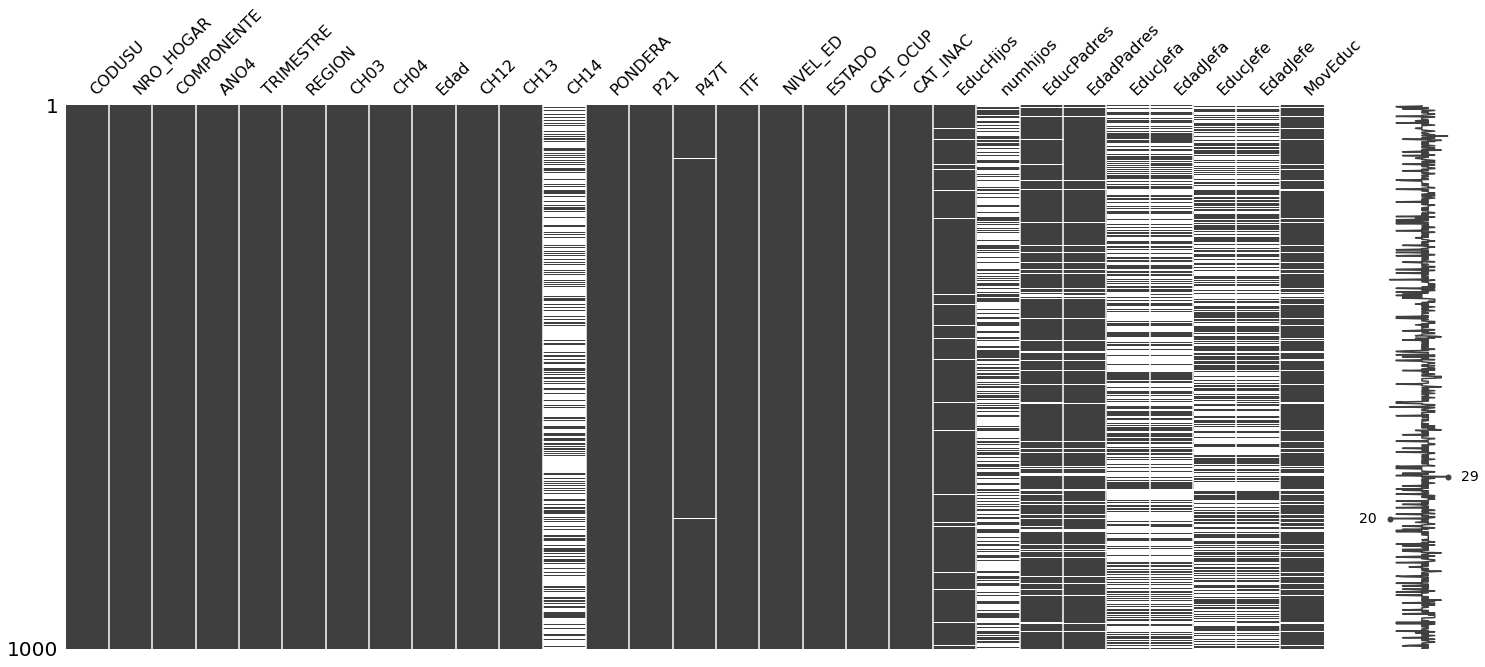

In [24]:
msno.matrix(eph.sample(1000))

###  Tratamiento de valores nulos


En este caso, los datos nulos pueden provenir de un error de tipeo o de una no respuesta por parte del encuestado. Por lo que, se decidió reemplazarlos por ceros, ya que si son eliminados disminuye considerablemente el tamaño de la muestra porque son una cantidad importante de registros (al tener en cuenta las variables CH14, EducHijos y EducPadres).

In [25]:
eph = eph.fillna(0)  # Reemplazamos los NaN's por ceros

Eliminamos las filas en las que la Educación y la edad del Padre son iguales cero porque son **valores erróneos.**

In [26]:
eph = eph.drop(eph[(eph.EducPadres == 0) & (eph.EdadPadres == 0)].index)

## 3.1.6. Verificación de valores duplicados

Identificamos los valores duplicados en el *dataframe*, es decir, todos los hijos que han sido encuestados dos veces debido a la metodología utilizada para realizar la encuesta. Los hijos se identifican por tener el mismo **CODUSU, NRO_HOGAR y COMPONENTE**, y se cuenta la cantidad de duplicados que hay.

In [27]:
eph.duplicated(['CODUSU', 'NRO_HOGAR','COMPONENTE']).count()

117719

### Tratamiento de valores duplicados

Debido a que si dejamos los valores duplicados vamos a estar considerando dos veces a los mismos individuos, estos valores se eliminarán para evitar que los resultados estén sesgados.

In [28]:
eph = eph.drop_duplicates(['CODUSU', 'NRO_HOGAR','COMPONENTE'])
eph.head(5)

,CODUSU,NRO_HOGAR,COMPONENTE,ANO4,TRIMESTRE,REGION,CH03,CH04,Edad,CH12,...,CAT_INAC,EducHijos,numhijos,EducPadres,EdadPadres,EducJefa,EdadJefa,EducJefe,EdadJefe,MovEduc
0,TQRMNOPPQHLKLMCDEFIAH00646702,1,1,2021,1,43,1,2,27,7,...,0,17.0,0.0,17.0,27.0,17.0,27.0,0.0,0.0,NO
1,TQRMNOPPRHLKLMCDEFIAH00665104,1,1,2021,1,43,1,2,26,7,...,3,16.0,0.0,16.0,26.0,16.0,26.0,0.0,0.0,NO
2,TQRMNOPPRHMOLQCDEFIAH00701809,1,1,2021,1,43,1,1,38,4,...,0,9.0,0.0,10.0,39.0,0.0,0.0,10.0,39.0,NO
3,TQRMNOPPSHLKLMCDEFIAH00646637,1,1,2021,1,43,1,1,25,7,...,0,17.0,0.0,17.0,25.0,0.0,0.0,17.0,25.0,NO
4,TQRMNOPPSHMOLQCDEFIAH00698759,1,1,2021,1,43,1,2,49,2,...,0,6.0,0.0,6.0,50.0,6.0,50.0,5.0,50.0,NO


## 3.1.7. Transformaciones

Utilizando la técnica **Label Encoder**, transformaremos la variable categórica *MovEduc* de manera tal que ahora será una variable dummie la cual tendrá el valor de 0 cuando el valor de la columna *MovEduc* sea **NO** y 1 cuando sea **SI**.

In [29]:
# Visualizamos los valores que tiene la columna MovEduc
eph.MovEduc.unique()

array(['NO', 'SI', 0], dtype=object)

In [30]:
# Volvemos a correr el siguiente comando para que a los valores que ahora son 0 le asigne el valor de NO
eph.loc[(eph.EducPadres >= eph.EducHijos), 'MovEduc']= 'NO'
eph.loc[(eph.EducPadres < eph.EducHijos), 'MovEduc']= 'SI'

In [31]:
le = preprocessing.LabelEncoder()
eph['MovEduc'] = le.fit_transform(eph.MovEduc)

In [32]:
eph.head()

,CODUSU,NRO_HOGAR,COMPONENTE,ANO4,TRIMESTRE,REGION,CH03,CH04,Edad,CH12,...,CAT_INAC,EducHijos,numhijos,EducPadres,EdadPadres,EducJefa,EdadJefa,EducJefe,EdadJefe,MovEduc
0,TQRMNOPPQHLKLMCDEFIAH00646702,1,1,2021,1,43,1,2,27,7,...,0,17.0,0.0,17.0,27.0,17.0,27.0,0.0,0.0,0
1,TQRMNOPPRHLKLMCDEFIAH00665104,1,1,2021,1,43,1,2,26,7,...,3,16.0,0.0,16.0,26.0,16.0,26.0,0.0,0.0,0
2,TQRMNOPPRHMOLQCDEFIAH00701809,1,1,2021,1,43,1,1,38,4,...,0,9.0,0.0,10.0,39.0,0.0,0.0,10.0,39.0,0
3,TQRMNOPPSHLKLMCDEFIAH00646637,1,1,2021,1,43,1,1,25,7,...,0,17.0,0.0,17.0,25.0,0.0,0.0,17.0,25.0,0
4,TQRMNOPPSHMOLQCDEFIAH00698759,1,1,2021,1,43,1,2,49,2,...,0,6.0,0.0,6.0,50.0,6.0,50.0,5.0,50.0,0


## 3.1.8. Filtrado de variables II

Creamos un nuevo dataframe llamado _EPH_ donde dejo sólo las variables que son de mi interés con la función **df.filter()**


In [33]:
EPH = eph.filter(['CODUSU','NRO_HOGAR','REGION','CH03','CH04','CH06','EducJefa','EducJefe','EducPadres','EducHijos','EdadJefa','EdadJefe','EdadPadres','Edad','numhijos','P21','MovEduc'])
EPH = EPH.fillna(0)     # Reemplazamos los NaNs por cero
EPH.head(5)  # Visualizamos la base de datos

,CODUSU,NRO_HOGAR,REGION,CH03,CH04,EducJefa,EducJefe,EducPadres,EducHijos,EdadJefa,EdadJefe,EdadPadres,Edad,numhijos,P21,MovEduc
0,TQRMNOPPQHLKLMCDEFIAH00646702,1,43,1,2,17.0,0.0,17.0,17.0,27.0,0.0,27.0,27,0.0,40000.0,0
1,TQRMNOPPRHLKLMCDEFIAH00665104,1,43,1,2,16.0,0.0,16.0,16.0,26.0,0.0,26.0,26,0.0,0.0,0
2,TQRMNOPPRHMOLQCDEFIAH00701809,1,43,1,1,0.0,10.0,10.0,9.0,0.0,39.0,39.0,38,0.0,30000.0,0
3,TQRMNOPPSHLKLMCDEFIAH00646637,1,43,1,1,0.0,17.0,17.0,17.0,0.0,25.0,25.0,25,0.0,-9.0,0
4,TQRMNOPPSHMOLQCDEFIAH00698759,1,43,1,2,6.0,5.0,6.0,6.0,50.0,50.0,50.0,49,0.0,17000.0,0


# 3.2. Análisis Exploratorio de Datos (EDA)

---

## 3.2.1. Información general sobre el conjunto de datos

In [34]:
# Tamaño del conjunto de datos
print("Filas, Columnas", eph.shape)

# Nombre de las variables
print("\nNombre de las variables: \n", eph.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", eph.dtypes)

# Verificamos la presencia de falores faltantes
print("\nValores faltantes: \n", eph.isnull().sum())

Filas, Columnas (59743, 29)

Nombre de las variables: 
 Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'ANO4', 'TRIMESTRE', 'REGION',
       'CH03', 'CH04', 'Edad', 'CH12', 'CH13', 'CH14', 'PONDERA', 'P21',
       'P47T', 'ITF', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC',
       'EducHijos', 'numhijos', 'EducPadres', 'EdadPadres', 'EducJefa',
       'EdadJefa', 'EducJefe', 'EdadJefe', 'MovEduc'],
      dtype='object')

Tipos de datos: 
 CODUSU         object
NRO_HOGAR       int64
COMPONENTE      int64
ANO4            int64
TRIMESTRE       int64
REGION          int64
CH03            int64
CH04            int64
Edad            int64
CH12            int64
CH13            int64
CH14          float64
PONDERA         int64
P21           float64
P47T          float64
ITF           float64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP        int64
CAT_INAC        int64
EducHijos     float64
numhijos      float64
EducPadres    float64
EdadPadres    float64
EducJefa      float64
EdadJefa  

In [35]:
# Estadísticas descriptivas de las variables numéricas
eph.describe(include=[np.number]).round(2).T

,count,mean,std,min,25%,50%,75%,max
NRO_HOGAR,59743.0,1.09,1.59,1.0,1.0,1.0,1.0,73.0
COMPONENTE,59743.0,1.43,0.98,1.0,1.0,1.0,1.0,14.0
ANO4,59743.0,2021.38,0.48,2021.0,2021.0,2021.0,2022.0,2022.0
TRIMESTRE,59743.0,2.29,1.12,1.0,1.0,2.0,3.0,4.0
REGION,59743.0,36.12,14.51,1.0,40.0,42.0,43.0,44.0
CH03,59743.0,1.39,0.80,1.0,1.0,1.0,1.0,3.0
CH04,59743.0,1.45,0.50,1.0,1.0,1.0,2.0,2.0
Edad,59743.0,42.65,12.16,25.0,32.0,42.0,53.0,65.0
CH12,59743.0,4.65,2.00,0.0,4.0,4.0,6.0,99.0
CH13,59743.0,1.35,0.48,0.0,1.0,1.0,2.0,2.0


En la base de datos tenemos en las columnas las variables relevantes para el Jefe o jefa de hogar (Padres), para el jefe (Jefe) y la jefa (Jefa) de hogar y para los hijos. Si consideramos la base de datos como está, estaríamos considerando dos veces los mismos datos, ya que en las regresiones se tendría en cuenta la educación del Jefe/a de Hogar que da la variable EducHijos (que sería un valor erróneo porque en realidad nos interesa el valor de esa columna sólo cuando CH03 == 3) y al mismo tiempo se consideraría su educación que está dada por la variable EducPadres. Por lo tanto, eliminamos de la muestra a los padres, con el comando **df.drop()**, y obtenemos así en cada fila los datos de los hijos y padres que son identificados por su CODUSU, NRO_HOGAR y COMPONENTE

In [36]:
eph = eph.drop(eph[eph.CH03==1]. index)  # Eliminamos al Jefe/a de hogar

In [37]:
EPH = EPH.drop(EPH[EPH.CH03==1]. index)  # Eliminamos al Jefe/a de hogar

## 3.2.2. Análisis por medio de gráficos

## 3.2.2.1. Análisis univariado

### Medidas de tendencia central

In [38]:
print("Media aritmética de la Educación de los hijos =", np.mean(eph.EducHijos))

print("Moda de la Educación de los hijos =", mode(eph.EducHijos))

print("Mediana de la Educación de los hijos =", statistics.median(eph.EducHijos))

Media aritmética de la Educación de los hijos = 11.668308423913043
Moda de la Educación de los hijos = 12.0
Mediana de la Educación de los hijos = 12.0


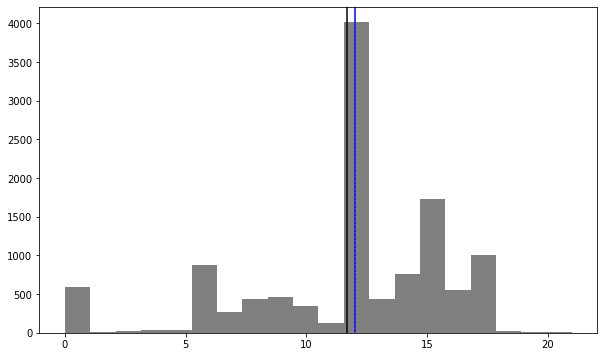

In [39]:
# Graficamos la distibución del nivel educativo de los hijos y marcamos con una línea vertical la media, la mediana y la moda.
plt.figure(figsize=(10, 6))

plt.hist(eph.EducHijos, 20, color='gray', align='mid')  # Creamos el histograma
plt.axvline(np.mean(eph.EducHijos), c='k')  # Graficamos la línea vertical que nos indica en donde está la media aritmética
plt.axvline(mode(eph.EducHijos), c='white', linestyle = ':')  # Graficamos la línea vertical que nos indica en donde está la moda
plt.axvline(statistics.median(eph.EducHijos), c='b')  # Graficamos la línea vertical que nos indica en donde está la mediana

Las medidas de tendencia central calculadas anteriormente han sido graficada en la figura anterior, como se puede observar que el valor promedio del nivel educativo de los hijos es de  aproximadamente 11 años, mientras que el nivel educativo más frecuente (moda) y el nivel educativo cuyo valor está en el medio de la distribución (mediana) es de 12 años. Además, se observa que hay más de 500 hijos que no tuvieron educación, eso se puede deber a un error de relevamiento o a una no respuesta por parte de encuestado


### Medidas de dispersión absolutas

In [40]:
# Calculamos el desvío estándar del nivel educativo de los hijos
desvio_estandar = np.std(eph.EducHijos)
desvio_estandar

4.096703969747418

La desviación entándar muestra qué tan dispersos están los datos respecto a la media. En este caso, el desvío estándar indica que los niveles educativos de los hijos están poco desviados respecto a su media.

In [41]:
# Calculamos el desvío absoluto de la mediana del nivel educativo de los hijos
desvio_absoluto = sc.stats.median_abs_deviation(eph.EducHijos)
desvio_absoluto

3.0

El desvío absoluto indica que tan alejados está el nivel educativo de los hijos respecto de la media. En este caso, estamos calculando la desviación absoluta donde se alcanza el 50% de los datos, es decir, que los datos están desviados un 3% respecto a la mediana.


In [42]:
# Calculamos la varianza del nivel educativo de los hijos
varianza = np.var(eph.EducHijos)
varianza

16.78298341574425

La varianza nos muestra la variabilidad del nivel educativo de los hijos respecto a su valor promedio. Sin embargo, no guarda relación con el valor de nuestra variable, sino con el valor cuadrado de la variable (en este caso sería $4^2 = 16$). Por ello la desviación estándar es una mejor medida de la dispersión de los datos respecto a la media, ya que es la raíz cuadrada de la varianza.

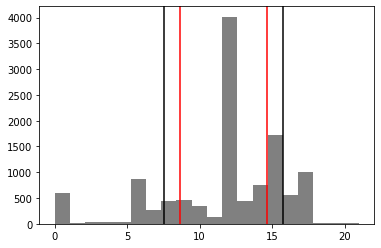

In [43]:
plt.hist(eph.EducHijos, 20, color='gray', align = 'mid')
plt.axvline(np.mean(eph.EducHijos)-desvio_estandar, c='k')
plt.axvline(np.mean(eph.EducHijos)+desvio_estandar, c='k')
plt.axvline(np.mean(eph.EducHijos)-desvio_absoluto, c='r')
plt.axvline(np.mean(eph.EducHijos)+desvio_absoluto, c='r')

In [44]:
# Calculamos el intervalo intercuartil
iqr=sc.stats.iqr(eph.EducHijos, rng=(25,75))
iqr

5.0

Identificamos qué tan ancho es el intervalo intercuartil (en donde tenemos el 50% de los datos), si es muy ancho tenemos una gran disperisón intercuartil; si es muy pequeño, la distribución es más alargada.

El valor del intervalo intercuartil está indicando que la diferencia entre el tercer (Q3) y primer (Q1) cuartil es de 5 años, es decir que los datos están poco dispersos respecto a la media. Esto se condice al analizar el histograma y el diagrama de caja y bigotes que se encuentra a continuación, en donde el rango intercuartílico es medido por el tamaño de la caja, el cual es igual a 5 años.
Algo importante a considerar es que si bien el intervalo intercuartil es una medida de dispersión similar a la desviación estándar o a la varianza, es mucho más robusta ya que excluye los valores atípicos que se encuentran el el primer y cuarto cuartil.

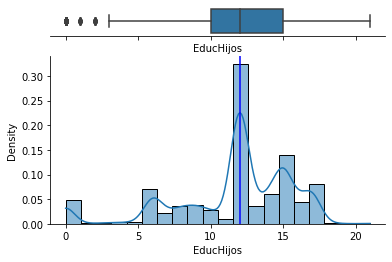

In [45]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})  # Creamos la figura

sns.boxplot(x=eph.EducHijos, ax=ax_box)   # Graficamos el boxplot
sns.histplot(x=eph.EducHijos, bins=20, kde=True, stat='density', ax=ax_hist)  # Graficamos el histograma

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)   # Determinamos los límites del eje x del histograma
sns.despine(ax=ax_box, left=True)  # Determinamos los límites del eje x del boxplot
plt.axvline(statistics.median(eph.EducHijos), c='b')  # Graficamos la línea vertical que nos indica en donde está la mediana

In [46]:
variation = sc.stats.variation(eph.EducHijos)
variation

0.35109664750990205

El coeficiente variación es una medida de la relación entre la desviación estándar y la media. En este caso, el coeficiente de variación indica que la dispersión del nivel educativo respecto a la media es relativamente bajo, ya que es 0,35.

### Medidas de asimetría

In [47]:
asimetria = sc.stats.skew(eph.EducHijos)
asimetria

-1.13778583731606

Al calcular la asimetría, su valor indica que esta distribución es *altamente asimétrica*, es decir, que no se parece a una distribución normal.

In [48]:
curtosis = sc.stats.kurtosis(eph.EducHijos)
curtosis

1.1942387181586689

La curtosis es de 1,19 lo cual nos muestra que la distribución es*platicúrtica*, es decir, que hay una baja concentración de los datos alrededor de la media.



Hacemos un gráfico circular que muestra la **proporción de hijos encuestados por sexo**

In [49]:
# Contamos la cantidad de encuestados por sexo
sexo1 = eph.groupby(['CH04'])['CH03'].count()

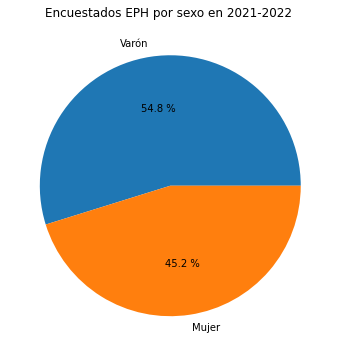

In [50]:
sexo = ['Varón', 'Mujer']  # creamos las etiquetas

fig, axs = plt.subplots(figsize=(8,6)) # creamos la figura

plt.pie(sexo1, labels = sexo, autopct="%0.1f %%")  # creamos el gráfico de torta
plt.title("Encuestados EPH por sexo en 2021-2022 ")  # le ponemos un título
plt.show()  # visualizamos la figura

El gráfico anterior muestra que el 54.8% de los hijos encuestados son varones, mientras que el 45.2% son mujeres.

Calculamos la **cantidad de hijos encuestados que alcanzó cada nivel educativo**

In [51]:
# Reemplazamos el nivel educativo 7 por 0, ya que representa a los que no tienen instrucción
eph['NIVEL_ED'] = eph['NIVEL_ED'].replace([7],[0])

In [52]:
# Contamos la cantidad de encuestados por nivel educativo
cant_niveled =eph.groupby(eph['NIVEL_ED'])['CH03'].count()

Hacemos un gráfico de la **distribución relativa de los encuestados por nivel educativo y por sexo**.

In [53]:
# Contamos la cantidad de encuestados por nivel educativo y por sexo
cant_niveled_sexo = eph[['CODUSU','CH04','NIVEL_ED']].groupby(by=['CH04','NIVEL_ED']).count().reset_index()

In [54]:
# Reemplazamos los id de la variable Sexo y Nivel educativo por su respectiva descripción
cant_niveled_sexo['CH04'] = cant_niveled_sexo['CH04'].replace([1,2],['Varón','Mujer'])
cant_niveled_sexo['NIVEL_ED'] = cant_niveled_sexo['NIVEL_ED'].replace([0,1,2,3,4,5,6],['Sin instrucción','Primaria inc', 'Primaria comp','Secundaria inc','Secundaria comp','Universitario inc','Universitario comp'])
cant_niveled_sexo.head()

,CH04,NIVEL_ED,CODUSU
0,Varón,Sin instrucción,27
1,Varón,Primaria inc,156
2,Varón,Primaria comp,585
3,Varón,Secundaria inc,1335
4,Varón,Secundaria comp,2302


In [55]:
eph.CH04.value_counts()  # Contamos la cantidad de encuestados por sexo

CH04
1    6454
2    5322
Name: count, dtype: int64

In [56]:
cant_niveled_sexo['CODUSU'].sum()  # Calculamos el tamaño de la muestra

11776

In [57]:
# Calculamos la cantidad relativa de encuestados por nivel educativo y por sexo
cant_niveled_sexo['CODUSU_Relsexo'] = 0
cant_niveled_sexo.loc[(cant_niveled_sexo.CH04=='Varón'),'CODUSU_Relsexo'] = (cant_niveled_sexo['CODUSU'] / 12475)*100
cant_niveled_sexo.loc[(cant_niveled_sexo.CH04=='Mujer'),'CODUSU_Relsexo'] = (cant_niveled_sexo['CODUSU'] / 10259)*100

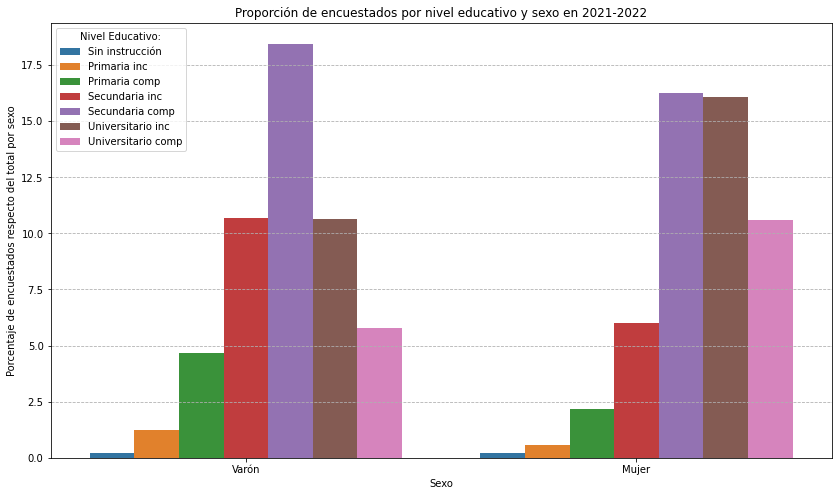

In [58]:
# Hacemos un gráfico de barras de la distribución de los encuestados por nivel educaivo en la EPH 2021-2022
plt.figure(figsize = (14, 8))  # creamos la figura

sns.barplot(y='CODUSU_Relsexo', x ='CH04', hue='NIVEL_ED', data = cant_niveled_sexo)  # creamos el gráfico de barra
plt.grid(axis='y', linestyle='dashed')  # le ponemos líneas entrecortadas en el eje y
plt.ylabel('Porcentaje de encuestados respecto del total por sexo')  # le ponemos nombre al eje y
plt.xlabel('Sexo')  # le ponemos nombre al eje x
plt.title('Proporción de encuestados por nivel educativo y sexo en 2021-2022')  # le ponemos título al gráfico
plt.legend(title = 'Nivel Educativo:')  # le ponemos una leyenda
plt.show()  # visualizamos la figura

Al analizar la distribución relativa de los encuestados por nivel eduactivo y por sexo, vemos que más del 17% de los varones finalizó la secundaria, mientras que un poco más del 15% de las mujeres lo hizo. Por otra parte, la cantidad de varones que no terminaron la secundaria es de aproximadamente el 11%, mientras que la cantidad de mujeres es del 6%. Con respecto a la cantidad de mujeres que terminaron la Universidad, se ve que es de más el 10%, mientras que la cantidad de varones es de aproximadamente el 6%.



Hacemos una **histograma** que muestra la distibución de los hijos por edades


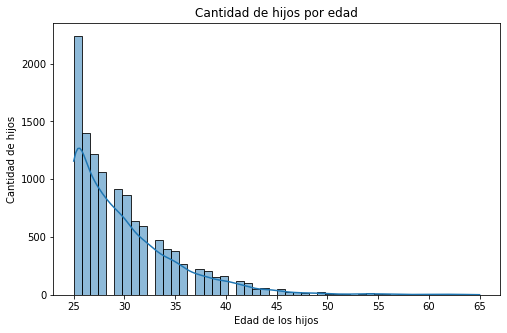

In [59]:
plt.figure(figsize = (8, 5))  # creamos la figura

sns.histplot(data = eph, x = 'Edad', bins = 50, kde=True)  # creamos el gráfico
plt.xlabel('Edad de los hijos')  # le ponemos nombre al eje
plt.ylabel('Cantidad de hijos')  # le ponemos nombre al eje y
plt.title('Cantidad de hijos por edad')  # le ponemos el título
plt.show()

En el gráfico anterior se observa que *la edad de los hijos* es asimétrica, estando sesgada hacia la izquierda, donde la mayor parte de la concentración de datos se encuentra al comienzo de la distribución. Esto podría deberse a que la mayoría de los hijos encuestados son jóvenes que tienen entre 25 y 30 años, a medida que la edad aumenta, la cantidad de hijos encuestados disminuye.

## Análisis de valores atípicos

A continuación, visualizamos la existencia de valores atípicos en las variables de Educación por medio de  **boxplots**

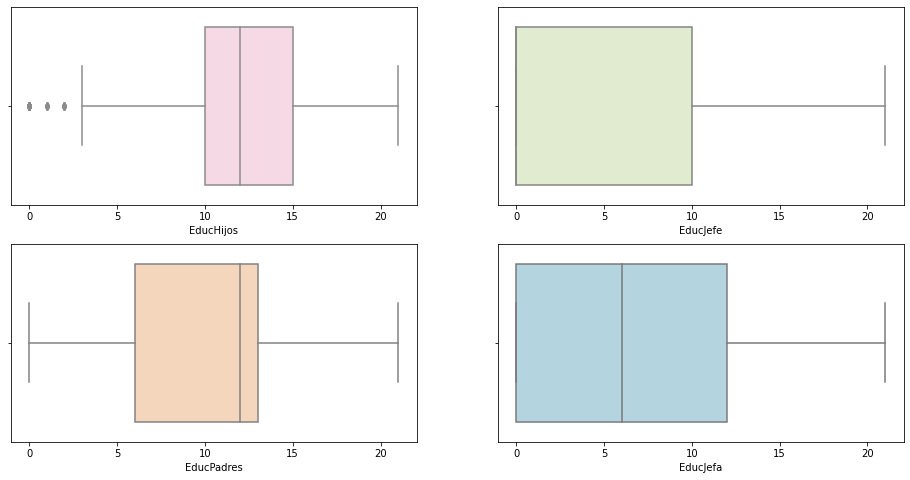

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8))  # creamos la figura

sns.boxplot(x=eph['EducHijos'], ax=axs[0][0], color='#F9D5E5')
sns.boxplot(x=eph['EducPadres'], ax=axs[1][0], color='#FDD5B1')
sns.boxplot(x=eph['EducJefe'], ax=axs[0][1], color='#E2F0CB')
sns.boxplot(x=eph['EducJefa'], ax=axs[1][1], color='#ADD8E6')
plt.show()

A partir de los gráficos anteriores podemos comparar la educación de padres (Jefe o Jefa de hogar) e hijos. Como se puede observar, la mediana del nivel eduactivo de padres e hios es 12 años. Sin embargo, se ve que la mayoría de los hijos tienen niveles educativos entre 10 y 15 años, mientras que los padres entre 6 y 13 años. Esto nos muestra claramente que ha habido cierta movilidad intergeneracional educativa, ya que los máximos niveles educativos alcanzados por los hijos son mayores que los alcanzados por los padres. Además, se observa que en el caso de los hijos, los valores educativos de cero a tres años son atípicos.

Por otro lado, al comparar la educación de los jefes y jefas de hogar, se observa que la mayoría de los jefes tienen niveles educativos entre 0 y 11 años, mientras que las jefas de hogar entre 0 y 12 años, siendo muy similares.

## 3.2.2.2. Análisis bivariado


Creamos un nuevo dataframe llamado *EPH_corr* con las columnas que consideramos que son más relevantes para el análisis.

In [61]:
EPH_corr = EPH[['EducHijos','EducPadres','CH04','Edad','EducJefe','EducJefa','EdadPadres','EdadJefe','EdadJefa','Edad','numhijos','P21']]
EPH_corr = EPH_corr.rename(columns = {'CH04':'Sexo', 'P21':'Ingreso'})

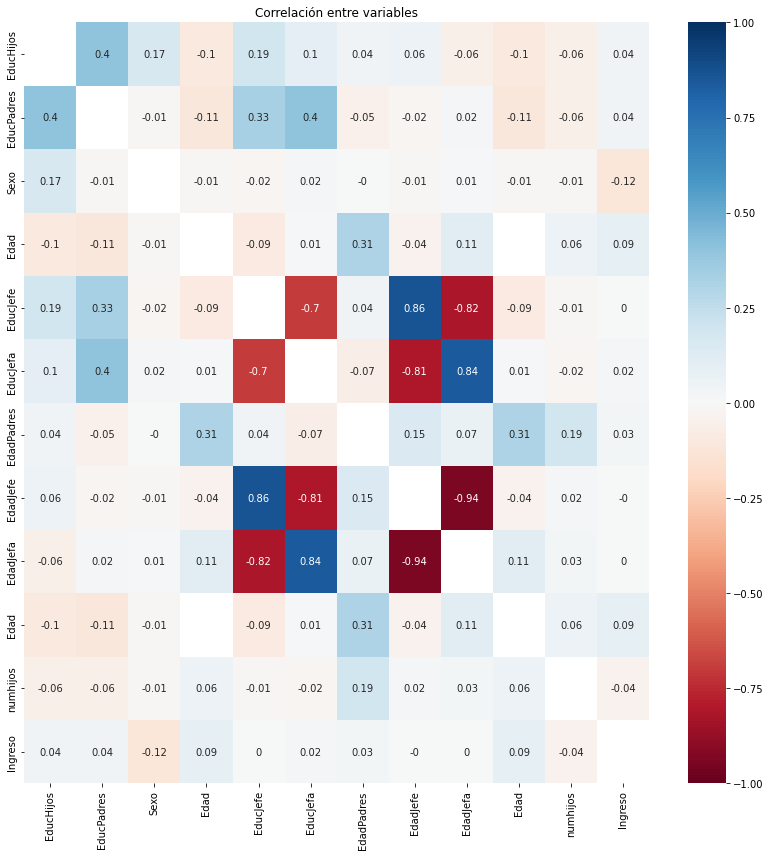

In [62]:
# Calculamos la matriz de correlación de la base de datos
matriz_correlacion = EPH_corr.corr()
matriz_correlacion = matriz_correlacion.round(2)

# Graficamos la matriz de correlación
plt.figure(figsize = (14,14))  # Creamos la figura
mask2 = matriz_correlacion == 1
sns.heatmap(matriz_correlacion, annot = True, cmap = 'RdBu', vmin = -1, vmax = 1, mask = mask2)  # Graficamos la matriz de correlación
plt.title('Correlación entre variables')  # le ponemos el título
plt.show()

En el *heatmap* anterior se puede observar la correlación entre los distintos pares de variables. Los resultados obtenidos muestran que las variables que están más correlacionadas son la Educación del Hijo y la Educación del Padre, cuya correlación es muy fuerte y positiva. También se observa que EducJefe, EducJefa y el ingreso del hijo están levemente correlacionadas con la Educación de los Hijos.



In [63]:
np.corrcoef(eph.P21, eph.EducHijos)

array([[1.        , 0.04308064],
       [0.04308064, 1.        ]])

El coeficiente de correlación nos muestran que para los datos de la muestra prácticamente no existe una relación entre el Ingreso y la educación de los hijos.

## 3.2.2.3. Análisis multivariado


El siguiente gráfico es un *Facet grid* que nos permite visualizar en un gráfico de dos dimensiones la relaciones entre tres o más variables.

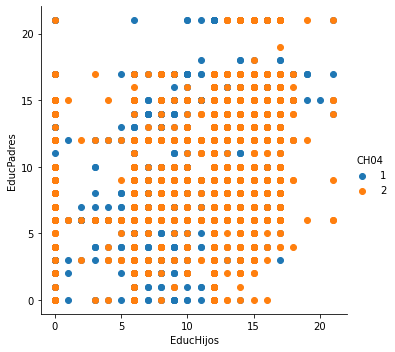

In [64]:
#FacetGrid
sns.FacetGrid(eph, hue = 'CH04', height = 5).map(plt.scatter,'EducHijos','EducPadres').add_legend();
plt.show()

En el gráfico anterior se puede observar que los puntos naranjas, que representan a las mujeres, son los que predominan; en donde las mujeres son las que han alcanzado mayores años de educación, siendo que sus padres también lograron 10 o más años de educación.

A continuación, para responder las preguntas de investigación se utilizarán otros gráficos que permiten realizar análisis univariado y bivariado.

## 3.2.5. Análisis específicos para responder a las preguntas de investigación

En esta sección para responder las preguntas de investigación utilizaremos el *dataframe* llamado **EPH** obtenido en la *sección 3.7. Filtrado de variables II*. A continuación, visualizamos los nombres de las columnas del df.

In [65]:
EPH.columns  # Visualizamos los nombres de las columnas de la base de datos

Index(['CODUSU', 'NRO_HOGAR', 'REGION', 'CH03', 'CH04', 'EducJefa', 'EducJefe',
       'EducPadres', 'EducHijos', 'EdadJefa', 'EdadJefe', 'EdadPadres', 'Edad',
       'numhijos', 'P21', 'MovEduc'],
      dtype='object')

### Pregunta: ¿Cuántos padres e hijos completaron cada nivel educativo?

Para dar respuesta a esta pregunta, visualizaremos la distribución del nivel educativo de los hijos y de los padres

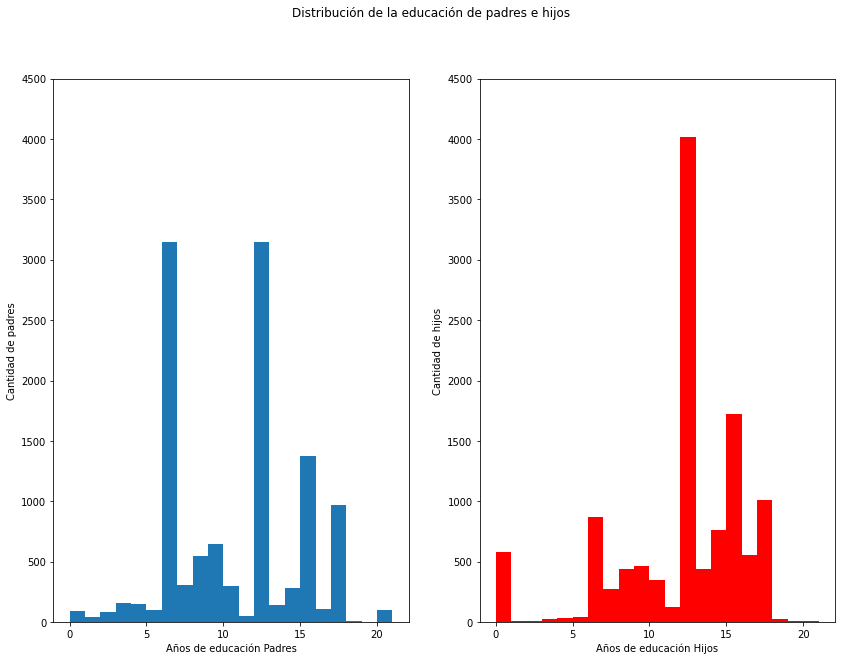

In [66]:
n_bins = 21
x1 = eph['EducPadres']
x2 = eph['EducHijos']
plt.subplots(1,2, figsize=(14,10))

ax0 = plt.subplot(1,2,1)
ax0.hist(x1,n_bins)
ax0.set_ylim([0, 4500])
ax0.set_ylabel("Cantidad de padres")
ax0.set_xlabel("Años de educación Padres")


ax1 = plt.subplot(1,2,2)
ax1.hist(x2, n_bins, color='r')
ax1.set_ylim([0, 4500])
ax1.set_ylabel("Cantidad de hijos")
ax1.set_xlabel("Años de educación Hijos")

plt.suptitle("Distribución de la educación de padres e hijos")
plt.show()

A partir de los gráficos anteriores se visualiza que la mayoría de los padres ha completado o la primaria o la secundaria, mientras que la mayoría de los hijos completó la secundaria. Además, se puede observar que ha habido un cierto nivel de movilidad intergeneracional educativa, ya que una mayor cantidad de hijos han alcanzado 12 años o más de educación formal en comparación con la cantidad de padres. Por otra parte, se observa una gran cantidad de hijos que no tienen educación debido a que se le asignó a los valores faltantes el valor cero.


### Pregunta: ¿Cuáles son los factores que influyen en el nivel educativo de una persona?


A continuación analizamos la correlación entre algunos factores que se consideran que influyen en el nivel educativo y el nivel educativo por medio de una **matriz de correlación**.

In [67]:
# Calculamos la matriz de correlación con las variables que consideramos que pueden influir sobre la educación del hijo
matriz_corr = EPH[['EducHijos', 'EducPadres', 'CH04', 'EdadPadres', 'Edad','numhijos']].corr()

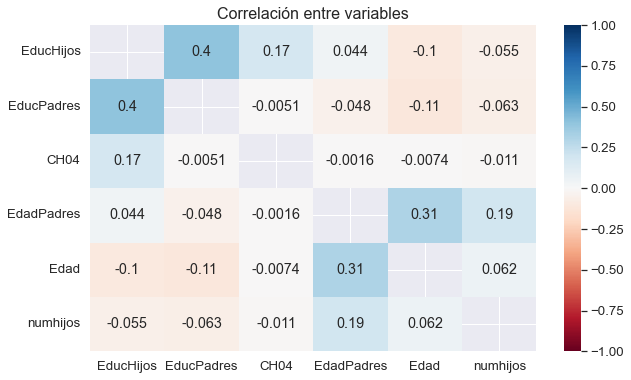

In [68]:
# Graficamos la matriz de correlación entre las variables de interés
plt.figure(figsize= (10,6))

sns.set(font_scale=1.2)
mask1 = matriz_corr==1
sns.heatmap(matriz_corr, annot=True, cmap='RdBu', vmin = -1, vmax = 1, mask = mask1)
plt.title('Correlación entre variables', fontsize=16)
plt.show()

La matriz de correlación anterior muestra que las variables que tienen una mayor relación lineal respecto al nivel educativo alcanzado por los hijos son: la educación de los padres, con una fuerte correlación positiva; el sexo, que tiene una débil relación positiva y la edad con una débil correlación negativa; el resto de las variables tiene una correlación inferior al 0.10 en valor absoluto. Estos resultados muestran que el máximo nivel educativo alcanzado por los hijos está positiva y fuertemente relacionado con el nivel educativo de sus padres, es decir, que cuanto mayor sea el nivel educativo por los padres, mayor será el nivel educativo de los hijos.

### Pregunta: ¿Existe una relación entre el nivel educativo alcanzado por un hijo y el de sus padres? En caso de que exista una relación, ¿cómo es esa relación?

Para responder a esta pregunta, creamos un gráfico de dispersión que muestra la relación entre el nivel educativo alcanzado por los hijos("EDUC") y el nivel educativo alcanzado por los padres ("EducPadres")

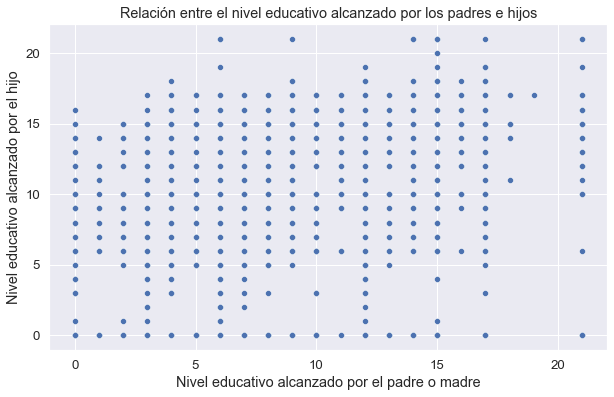

In [69]:
plt.figure(figsize = (10, 6))  # creamos la figura

sns.scatterplot(data = eph, x = 'EducPadres', y = 'EducHijos')  # graficamos
plt.xlabel('Nivel educativo alcanzado por el padre o madre')  # le ponemos nombre al eje
plt.ylabel('Nivel educativo alcanzado por el hijo')  # le ponemos nombre al eje y
plt.title('Relación entre el nivel educativo alcanzado por los padres e hijos')  # le ponemos el título
plt.show()

In [70]:
# Calculamos el coeficiente de correlación de Pearson entre la educación del padre y del hijo
EPH[['EducPadres','EducHijos']].corr()

,EducPadres,EducHijos
EducPadres,1.000000,0.403022
EducHijos,0.403022,1.000000


A partir del *scatter* y del coeficiente de correlación de Pearson obtenido, se puede afirmar que la educación del padre y del hijo están fuertemente correlacionados, donde esa relación es positiva. Esto indica que cuanto mayor es el nivel educativo alcanzado por los padres, mayor será el nivel educativo del hijo.

### Pregunta: ¿El nivel educativo del jefe o jefa de hogar tienen la misma relación con el nivel educativo alcanzado por el hijo?

Para responder esta pregunta vamos a analizar, por un lado, la correlación entre el nivel educativo del hijo/a y el del padre, y, por otro lado, la correlación entre el nivel educativo del hijo/a y el de la madre.

In [71]:
# Calculamos el coeficiente de correlación de Pearson entre la educación del jefe de hogar, de la jefa y del hijo
EPH[['EducHijos', 'EducJefe', 'EducJefa']].corr()

,EducHijos,EducJefe,EducJefa
EducHijos,1.000000,0.188688,0.097825
EducJefe,0.188688,1.000000,-0.700153
EducJefa,0.097825,-0.700153,1.000000


La tabla de correlación anterior muestra que el nivel educativo del jefe y jefa de hogar tienen un efecto positivo, pero el efecto de la educación del padre sobre la educación de los hijos es mayor que el de la educación de la madre.


### Pregunta: ¿Cuál fue la movilidad intergeneracional educativa de los hijos encuestados en 2021 y 2022?

A continuación, obtendremos una aproximación de la movilidad intergeneracional por medio del cálculo de la proporción de hijos que han alcanzado más años de educación que sus padres. Para ello, contaremos la cantidad de hijos que alcanzaron más años de educación que sus padres y los que no.

In [72]:
eph.MovEduc.value_counts()

MovEduc
1    6090
0    5686
Name: count, dtype: int64

In [73]:
MovIntEduc = 6090 / 11776 * 100
MovIntEduc

51.71535326086957

El resultado anterior indica que el 51,71% de los individuos encuestados ha alcanzado más años de educación que su padre/madre. Lo cual muestra que durante el periodo 2021-2022 ha habido movilidad educativa intergeneracional.

## 3.2.6. Conclusiones del EDA

A partir del _Análisis Expliratorio de los Datos_ realizado, se pudo observar, entre otras cosas, que la mayor cantidad de hijos encuestados son hombres y que el máximo nivel educativo de la mayoría de los encuestados fue la secundaria completa.
También se observó que hubo movilidad intergeneracional educativa, ya que una mayor cantidad de hijos alcanzaron 12 o más años de educación formal en comparación con la cantidad de padres que lo hicieron.

Al analizar cuáles son los factores que determinan el máximo nivel educativo alcanzado por una persona, se encontró que los principales factores son su edad y el máximo nivel educativo alcanzado por sus padres, pudiéndose afirmar que existe una relación fuerte y positiva entre el nivel educativo de los padres y del hijo, es decir que cuanto mayor sea el nivel educativo del padre o la madre, mayor será el nivel educativo del hijo.

Por último, se observó que el nivel educativo del jefe de hogar tiene una mayor influencia sobre la educación de su hijo en comparación al efecto de la educación de la madre.


---


## 4. Selección de features

Utilizamos el dataframe _EPH_corr_. Luego renombramos las columnas CH04 y P21 para que su nombre sea más descriptivo del contenido de la variable.

In [74]:
# Borramos las variables categóricas y la CH03 que no nos servirá al hacer el modelo de regresión
EPH_reg = EPH.drop('CODUSU',axis = 1)
EPH_reg = EPH_reg.drop('NRO_HOGAR',axis = 1)
EPH_reg = EPH_reg.drop('REGION',axis = 1)
EPH_reg = EPH_reg.drop('CH03',axis = 1)
EPH_reg = EPH_reg.drop('MovEduc',axis = 1)
EPH_reg

,CH04,EducJefa,EducJefe,EducPadres,EducHijos,EdadJefa,EdadJefe,EdadPadres,Edad,numhijos,P21
5,1,0.0,6.0,6.0,8.0,0.0,65.0,65.0,37,4.0,-9.0
13,1,0.0,6.0,6.0,12.0,0.0,54.0,54.0,25,1.0,-9.0
16,1,0.0,1.0,1.0,6.0,0.0,58.0,58.0,28,1.0,-9.0
23,2,0.0,10.0,10.0,12.0,0.0,64.0,64.0,30,2.0,-9.0
24,2,0.0,10.0,10.0,12.0,0.0,64.0,64.0,32,2.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...
129688,2,12.0,0.0,12.0,10.0,56.0,0.0,56.0,31,9.0,0.0
129699,2,0.0,15.0,15.0,15.0,0.0,41.0,41.0,25,1.0,-9.0
129767,2,6.0,0.0,6.0,12.0,64.0,0.0,64.0,26,1.0,40000.0
129771,2,12.0,14.0,14.0,12.0,55.0,55.0,55.0,26,1.0,0.0


In [75]:
x = EPH_reg.drop('EducHijos', axis = 1)  # La variable x contiene todas las columnas excepto EducHijos
y = EPH_reg['EducHijos']  # La variable y sólo contiene la columna EducHijos

## 4.1. Forward selection

In [76]:
# Obtenemos los mejores features siguiendo el proceso de selección hacia adelante con un nivel de significancia de 0.05
best_features, pvals = forward_selection(x,y,significance_level=0.05)

['EducPadres'] 0.0
['EducPadres', 'CH04'] 7.36659770760924e-98
['EducPadres', 'CH04', 'EducJefa'] 6.4645572317092815e-18
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres'] 5.722865902846505e-13
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad'] 4.097754185640198e-18
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21'] 1.2323809641793457e-10
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21', 'numhijos'] 3.7496718598667345e-06
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21', 'numhijos', 'EducJefe'] 0.006332556195985811


## 4.2. Backward selection

In [77]:
# Obtenemos los mejores features siguiendo el proceso de selección hacia atrás con un nivel de significancia de 0.05
best_features, worst_features, pvals_worst_features=backward_elimination(x,y, significance_level=0.05)

['CH04', 'EducJefa', 'EducJefe', 'EducPadres', 'EdadJefa', 'EdadJefe', 'EdadPadres', 'Edad', 'numhijos', 'P21'] 6.8463515951370105e-106
['CH04', 'EducJefe', 'EducPadres', 'EdadJefa', 'EdadJefe', 'EdadPadres', 'Edad', 'numhijos', 'P21'] 3.2425161939253492e-251
['CH04', 'EducPadres', 'EdadJefa', 'EdadJefe', 'EdadPadres', 'Edad', 'numhijos', 'P21'] 0.0


## 4.3. Stepwise selection

In [78]:
# Obtenemos los mejores features siguiendo el proceso de selección hacia adelante y hacia atrás con un nivel de significancia de 0.05
best_features=stepwise_selection(x,y,SL_in=0.05,SL_out = 0.05)

['EducPadres'] 0.0
['EducPadres', 'CH04'] 7.36659770760924e-98
['EducPadres', 'CH04', 'EducJefa'] 6.4645572317092815e-18
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres'] 5.722865902846505e-13
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad'] 4.097754185640198e-18
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21'] 1.2323809641793457e-10
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21', 'numhijos'] 3.7496718598667345e-06
['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21', 'numhijos', 'EducJefe'] 0.006332556195985811


En el modelo de regresión utilizaremos las mejores 6 features obtenidas a partir del *Stepwise selection*, que son: ['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21']. Esto se debe a que se compararon los resultados obtenidos en el modelo de regresión al considerar 7 y 10 features, y se observó que las métricas de evaluación mejoraron al considerar 6 features.  

## 5. Aprendizaje supervisado: Entrenamiento y testeo de un modelo de Machine Learning

---

## 5.1. División de datos

In [79]:
# Creamos los subsets que utilizaremos en el modelo de regresión
x = EPH_reg[['EducPadres', 'CH04', 'EducJefa', 'EdadPadres', 'Edad', 'P21', 'numhijos']]
y = EPH_reg['EducHijos']

In [80]:
# Dividimos los subsets en training y testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

## 5.2 Entrenamiento y evaluación del modelo de regresión

El modelo elegido fue la *regresión lineal.*

---

## 5.2.1. Entrenamiento: regresión y métricas de evaluación

In [81]:
# Definimos el modelo de Regresión Lineal de entrenamiento
reg = linear_model.LinearRegression().fit(x_train, y_train)

In [82]:
# Predecimos los valores de y para el entrenamiento
y_estimated = reg.predict(x_train)
y_estimated

array([ 9.9891698 , 11.00013717, 14.84045064, ..., 11.61048443,
       11.67066623, 14.32029709])

In [83]:
# Visualizamos el coeficiente de cada una de las variables de la regresión
reg.coef_

array([ 4.13240308e-01,  1.54240159e+00, -4.54311312e-02,  6.21516333e-02,
       -5.95113766e-02,  6.93117256e-06, -4.39892495e-02])

In [84]:
# Visualizamos el intercepto
reg.intercept_

3.6855226964659913

In [85]:
coef_df = pd.DataFrame(reg.coef_, x.columns, columns=['Coeficiente'])
coef_df

,Coeficiente
EducPadres,0.413240
CH04,1.542402
EducJefa,-0.045431
EdadPadres,0.062152
Edad,-0.059511
P21,0.000007
numhijos,-0.043989


El *dataframe* anterior nos muestra los coeficientes de cada una de las variables independientes, en donde el más importante es el coeficiente de la variable **EducPadres**, ya que muestra en qué medida el nivel educativo alcanzado por los padres determina el máximo nivel educativo alcanzado por sus hijos. En este caso, el coeficiente es igual a 0,41 lo cual muestra que, manteniendo todo lo demás constante, el logro educativo del hijo depende en un 41% del logro educativo de su padre o madre. Por lo tanto, se puede afirmar que la MEI en el periodo 2021-2022 ha sido alta (1-0,41=0,59).

In [86]:
# Calculamos el coeficiente de determinación del entrenamiento
r2=r2_score(y_train,y_estimated)
# Calculamos el error cuadrático medio del entrenamiento
RMSE=mean_squared_error(y_train, y_estimated)
# Calculamos el error absoluto medio del entrenamiento
MAE=mean_absolute_error(y_train, y_estimated)

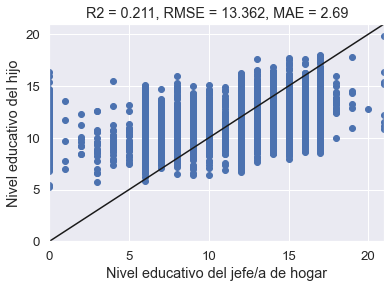

In [87]:
# Gráfico de dispersión para los valores de "y" reales y estimados para el modelo del set de training
plt.scatter(y_train, y_estimated)  # graficamos
plt.plot([0,y_train.max()],[0,y_train.max()], color='k')  # graficamos la línea que parte desde el orgien
plt.ylim(y_train.min(),y_train.max())  # determinamos los límites del eje y
plt.xlim(y_train.min(),y_train.max())  # determinamos los límites del eje x
plt.title('R2 = ' + str(np.round(r2,3))+', RMSE = '+str(np.round(RMSE,3))+', MAE = '+str(np.round(MAE,3)))
plt.xlabel('Nivel educativo del jefe/a de hogar')  # le ponemos nombre al eje
plt.ylabel('Nivel educativo del hijo')  # le ponemos nombre al eje y
plt.show()

## 5.2.2. Testeo: regresión y métricas de evaluación

In [88]:
# Estimamos los valores de y para el testeo
y_estimated2 = reg.predict(x_test)
y_estimated2

array([11.3111857 , 13.34425553, 10.37070139, ..., 13.7906866 ,
       11.24116502,  9.44117849])

In [89]:
# Calculamos el coeficiente de determinación del testeo
r2=r2_score(y_test,y_estimated2)
# Calculamos el error cuadrático medio del testeo
RMSE=mean_squared_error(y_test, y_estimated2)
# Calculamos el error absoluto medio del testeo
MAE=mean_absolute_error(y_test, y_estimated2)

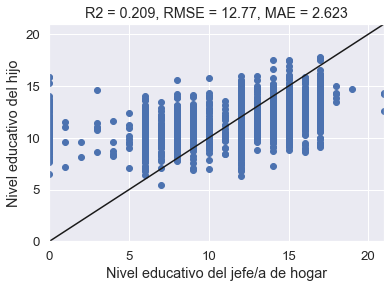

In [90]:
# Gráfico de dispersión para los valores de "y" reales y estimados para el modelo del set de testing
plt.scatter(y_test, y_estimated2)  # graficamos
plt.plot([0,y_test.max()],[0,y_test.max()], color='k')  # graficamos la línea que parte desde el orgien
plt.ylim(y_test.min(),y_test.max())  # determinamos los límites del eje y
plt.xlim(y_test.min(),y_test.max())  # determinamos los límites del eje x
plt.title('R2 = ' + str(np.round(r2,3))+', RMSE = '+str(np.round(RMSE,3))+', MAE = '+str(np.round(MAE,3)))
plt.xlabel('Nivel educativo del jefe/a de hogar')  # le ponemos nombre al eje
plt.ylabel('Nivel educativo del hijo')  # le ponemos nombre al eje y
plt.show()

In [91]:
# Creamos un df en el cual mostramos el valor actual de y, el valor predicho, el sesgo y el porcentaje de error
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_estimated2})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
39500,12.0,11.311186,0.688814,5.740119
11553,15.0,13.344256,1.655744,11.038296
105551,12.0,10.370701,1.629299,13.577488
22405,7.0,10.156218,-3.156218,-45.088822
14718,12.0,11.853561,0.146439,1.220326
...,...,...,...,...
3153,15.0,10.967342,4.032658,26.884385
50259,7.0,9.632129,-2.632129,-37.601848
23061,0.0,13.790687,-13.790687,-inf
70505,15.0,11.241165,3.758835,25.058900


In [92]:
# Calculamos el valor promedio del sesgo
df.Sesgo.mean()

0.02989302957470845

## Elección de los mejores hiper parámetros con GridSearchCV

### Regularización

A continuación se aplicará la regularización para evitar el overfitting en nuestro modelo, ya que la regularización controla el excesivo ajuste de nuestro modelo a los datos de entrenamiento y mejora la capacidad de generalización del modelo. Primero se aplicará la regularización L1 (Lasso) y luego la regularización L2 (Ridge). Por último, se compararán los resultados obtenidos.

### Regresión lineal con regularización L1 (Lasso)

In [93]:
# Definimos el modelo de regresión lineal con regularización L1 (Lasso)
modelo = Lasso()

# Definimos el espacio de búsqueda de hiperparámetros
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Hacemos el GridSearch con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenamos
grid_search.fit(x_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejor hiperparámetro alpha:", best_params['alpha'])

# Obtenemos el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Evaluamos el modelo en los datos de prueba
y_pred = best_model.predict(x_test)

# Calculamos el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en el testing: {mse:.3f}")

# Calculamos el coeficiente de determinación
r2=r2_score(y_test,y_pred)
print(f"Coeficiente de determinación en el testing: {r2:.3f}")

Mejor hiperparámetro alpha: 0.01
Error cuadrático medio en el testing: 12.768
Coeficiente de determinación en el testing: 0.209


### Regresión Lineal con regularización L2 (Ridge)

In [94]:
# Definir el modelo de regresión lineal con regularización L2 (Ridge)
model = Ridge()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Configurar la búsqueda en malla con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda en malla en los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejor hiperparámetro alpha:", best_params['alpha'])

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en los datos de prueba: {mse:.3f}")

# Calculamos el coeficiente de determinación
r2=r2_score(y_test,y_pred)
print(f"Coeficiente de determinación en el testing: {r2:.3f}")

Mejor hiperparámetro alpha: 1
Error cuadrático medio en los datos de prueba: 12.770
Coeficiente de determinación en el testing: 0.209


## Validación Cruzada

La **validación cruzada** proporciona métricas más robustas y confiables del rendimiento del modelo en comparación con una única división de datos en training y testing. En este caso, utilizaremos tres métodos de validación cruzada: *K Folds, Leave One Out y Statified Folds* y veremos cuál es el que nos permite obtener los mejores resultados.

In [95]:
# Validaciones
kf = KFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()
skf = StratifiedKFold(5)

In [96]:
# Entrenamos
score_kf = cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'Resultados para cada fold con K Folds: {score_kf}')

Resultados para cada fold con K Folds: [-13.46270306 -12.83440777 -13.98913825 -13.23427871 -13.46616306]


In [97]:
def rmse(score_kf):
    rmse = (-score_kf)  # le saqué el cálculo de la raíz cuadrada np.sqrt
    print(f'rmse= {"{:.2f}".format(rmse)}')

rmse(score_kf.mean())

rmse= 13.40


In [98]:
# Entrenamos con Leave One Out y obtenemos como resultado el error cuadrático medio  para cada Fold
score_loo = cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv= loo, scoring="neg_mean_squared_error")
print(f'Resultados para cada fold con Leave One Out: {score_loo}')

Resultados para cada fold con Leave One Out: [-15.94315297  -1.00065111  -0.02548863 ...  -0.37331885 -11.09654067
  -7.19542546]


In [99]:
rmse(score_loo.mean())

rmse= 13.38


In [100]:
# Entrenamos con K Folds y obtenemos como resultado el error cuadrático medio para cada Fold
score_skf = cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv= skf, scoring="neg_mean_squared_error")
print(f'Resultados para cada fold con Stratified K Folds: {score_skf}')

Resultados para cada fold con Stratified K Folds: [-13.36415747 -13.72039228 -13.11648444 -13.47427827 -13.26446446]


In [101]:
rmse(score_skf.mean())

rmse= 13.39


Al obtener como resultado la "pérdida" del error cuadrático medio, lo que buscamos obtener es el mínimo valor del error, ya que esto nos indicaría una mejor performance. De manera tal que si comparamos los resultados obtenidos, observamos que la diferencia del valor del error cuadrático medio obtenido a partir de los métodos utilizados es mínima. Sin embargo, elegimos el método de K Folds  para calcular otras métricas.

In [102]:
# Entrenamos con K Folds y obtenemos como resultado el valor del R2 para cada Fold
r2_kf = cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv= kf, scoring="r2")
print(f'Resultados para cada fold con K Folds: {r2_kf}')

Resultados para cada fold con K Folds: [0.21676332 0.20098286 0.16983009 0.21467128 0.23993345]


In [103]:
# Obtenemos el valor del R^2 promedio
print(f'R^2 = {r2_kf.mean()}')

R^2 = 0.20843619966081056


In [104]:
# Entrenamos con K Folds y obtenemos como resultado la varianza explicada para cada Fold
var_kf = cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv= kf, scoring="explained_variance")
print(f'Resultados para cada fold con K Folds: {var_kf}')

Resultados para cada fold con K Folds: [0.21701043 0.20236391 0.17007334 0.21467128 0.2412497 ]


In [105]:
# Obtenemos el valor promedio de la varianza explicada
print(f'Varianza Explicada = {var_kf.mean()}')

Varianza Explicada = 0.20907373210239175


## Comparación de los resultados obtenidos

Al comparar los resultados obtenidos al realizar la regresión lineal con (L1 o L2) y sin regularización, se observa que el valor del error cuadrático medio del testing es $13.46$ y el valor del coeficiente de determinación es de $0.21$. De manera tal que se puede concluir que los resultados obtenidos son robustos.

Si comparamos los resultados obtenidos al hacer la regresión con los resultados obtenidos a partir de la validación cruzada utilizando K Folds, observamos que el coeficiente de determinación es menor en la validación cruzada y el error cuadrático medio mayor, ya que estos resultados son más robustos, nos indican que el modelo en realidad tiene una performance peor al modelo entrenado y testeado inicialmente.

## 5.3. Árbol de decisión para Regresión

En este caso sólo consideraremos una variable independiente (EducPadres) y una dependiente (EducHijos).

In [106]:
# Dividimos el set de train en feature y target
feature_name = "EducPadres"
target_name = "EducHijos"
data_train, target_train = eph[[feature_name]], eph[target_name]

In [107]:
# Definimos el dataset del testing
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(), data_train[feature_name].max()),columns=[feature_name],)

In [108]:
# Creamos el árbol de decisión para regresión
tree = DecisionTreeRegressor(criterion='squared_error', splitter='best',max_depth=2) # Establecemos que la máxima profundidad del árbol es 2
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

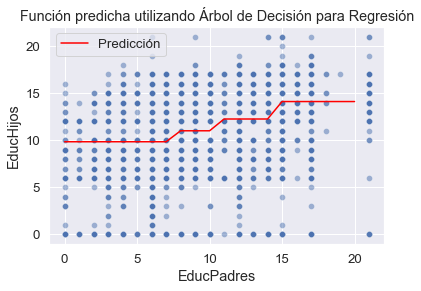

In [109]:
sns.scatterplot(data=eph, x=feature_name, y=target_name, alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Predicción", color = "red")
plt.legend()
_ = plt.title("Función predicha utilizando Árbol de Decisión para Regresión")

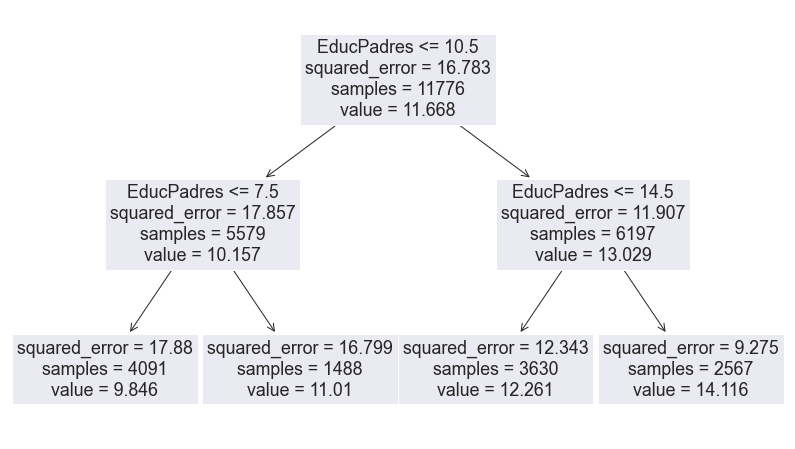

In [110]:
# Graficamos el árbol de decisión
_, ax = plt.subplots(figsize=(14, 8))
_ = plot_tree(tree, feature_names=[feature_name], ax=ax)

## Elección de los mejores hiper parámetros con GridSearchCV

In [111]:
# Definimos el modelo
modelo = DecisionTreeRegressor()

# Definimos el espacio de búsqueda de hiper parámetros
param_grid = {'max_depth': [None, 10, 20, 30],'min_samples_leaf': [1, 5, 10],'min_samples_split': [2, 5, 10],'max_features': ['auto', 'sqrt', 'log2']}

# Configurar la búsqueda en malla con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda en malla en los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en los datos de testing: {mse:.4f}")

# Calculamos el coeficiente de determinación
r2=r2_score(y_test,y_pred)
print(f"Coeficiente de determinación en el testing: {r2:.3f}")

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Error cuadrático medio en los datos de testing: 13.7232
Coeficiente de determinación en el testing: 0.150


## 5.4. Conclusiones de los modelos
   
## 5.4.1. Conclusiones del modelo de regresión

_Resultados entrenamiento:_

$R^2 = 0.211$

$RMSE = 13.362$

$MAE = 2.691$

_Resultados testeo:_

$R^2 = 0.209$

$RMSE = 12.77$

$MAE = 2.623$


A partir del $R^2$ obtenido se observa que los valores pronosticados explican una pequeña parte de los valores observados. Además, al considerar el $RMSE$ del entrenamiento y del testeo, se ve que el modelo tienen poco error al predecir los valores de la educación de los hijos y que esos errores son bastante similares. A partir de esto, se puede afirmar que en el modelo no hay _underfitting_ ni _overfitting_.





## 5.4.2. Conclusiones del modelo de Árbol de Decisión para regresión

El **árbol de decisión para regresión** comienza dividiendo la muestra en dos regiones cuando el valor de la educación de los padres es menor o mayor a 10 años, en ese caso el valor predicho para la educación del hijo es de 12 años aproximadamente. Luego tenemos dos ramas del árbol, por un lado, aquellos valores en los que la educación del padre es en promedio 7 años y medio, en donde se predice que la educación de los hijos será de 10 años; por otro lado, la educación promedio de los padres es de 14,5 años, en donde se predice que la educación de los hijos será de 13 años.

Después, vemos que el árbol predice que 4091 hijos de padres que tienen una educación promedio de 7,5 años van a lograr aproximadamente 10 años de educación, mientras que 1488 11 años. Con respecto a los padres que tienen una educación promedio de 14,5 años, el árbol predice que 3630 hijos van a alcanzar en promedio 12 años de educación, mientras que 2567 van a lograr 14 años.





## 6. Aprendizaje supervisado: Modelo de clasificación

## 6.1. División de datos

In [112]:
# Definimos las variables del problema de clasificación
x_clas = EPH[['EducPadres']]
y_clas = EPH['MovEduc']

In [113]:
# Dividimos en train y test
x_clas_train, x_clas_test, y_clas_train, y_clas_test = train_test_split(x_clas, y_clas, test_size=0.4, random_state=100)

In [114]:
# Definimos el modelo
LogReg = LogisticRegression().fit(x_clas_train,y_clas_train)
y_clas_pred = LogReg.predict(x_clas_test)

## 6.2. Evaluación del modelo de clasificación

### Matriz de confusión

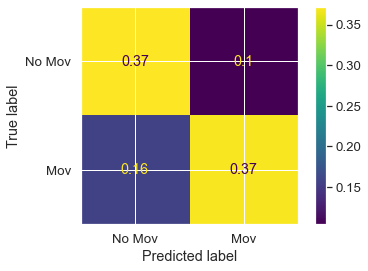

In [115]:
# Creamos la matriz de confusión, en donde elegimos el tipo de normalización 'all' para que la suma de la matriz sea el 100%
cm = confusion_matrix(y_clas_test, y_clas_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['No Mov','Mov'])
disp.plot()
plt.show()

In [116]:
tn, fp, fn, tp = confusion_matrix(y_clas_test, y_clas_pred, normalize = 'all').ravel()
tn, fp, fn, tp

(0.3718955635746126,
 0.10379961791551688,
 0.15538102313733815,
 0.3689237953725324)

Los resultados obtenidos a partir de la **matriz de confusión** nos muestran que nuestro modelo predice correctamente un 37% de las veces los *Verdaderos Positivos* (predijo que había movilidad, siendo que sí hubo) y un 37% de las veces los *Verdaderos Negativos* (predijo que no había movilidad, siendo que no hubo); mientras que hay un 10% de *Falsos Positivos* o **falsas alarmas** (predijo que había movilidad, siendo que no hubo) y un 16% de *Falsos Negativos* o **sorpresas** (predijo que no había movilidad, siendo que sí hubo).

### Accuracy

In [117]:
# Obtenemos el valor del accuracy score
accuracy_score(y_clas_test,y_clas_pred)

0.740819358947145

La métrica llamada **accuracy** nos muestra el porcentaje de veces que el modelo predice correctamente la categoría. A partir del resultado obtenido, se puede afirmar que el 74% de las veces el modelo predijo correctamente la categoría, mientras que el 26% restante de las veces no, en donde se produjeron sorpresas o falsas alarmas.

### Precision

In [118]:
# Obtenemos el valor de precision score
precision_score(y_clas_test,y_clas_pred)

0.7804220925011226

La métrica **precision** indica el porcentaje de veces que el modelo predice correctamente que va a haber movilidad (Verdadero Positivo) respecto a la cantidad total de casos en los que se predijo que había movilidad (Verdadero Positivo + Falso Positivo). Por lo tanto, el 78% de las veces el modelo predijo correctamente que iba a haber movilidad, mientras que el 22% de las veces fueros falsas alarmas, es decir, que se predijo que había movilidad, siendo que no hubo.

### Recall

In [119]:
# Obtenemos el valor del recall
recall_score(y_clas_test,y_clas_pred)

0.7036437246963563

La métrica **recall o sensibilidad** indica el porcentaje de veces que el modelo predice correctamente que va a haber movilidad (Verdadero Positivo) respecto a la cantidad total de casos en los que había movilidad (Verdadero Positivo + Falso Negativo). Por lo que, el 70% de las veces el modelo predijo correctamente que había movilidad mientras que el 30% restante de las veces fueron sorpresas, es decir, que se había predicho que no había movilidad, siendo que sí la hubo.


### Especificidad

In [120]:
# Obtenemos el valor de la especificidad
specificity = tn / (tn+fp)
specificity

0.7817938420348058

La métrica **especificidad** indica el porcentaje de veces que el modelo predice correctamente que **no** va a haber movilidad (Verdadero Negativo) respecto a la cantidad total de casos en los que no hubo movilidad (Verdadero Negativo + Falso Positivo). Por lo tanto, el 78% de las veces el modelo predice correctamente que no va a haber movilidad, mientras que el 22% de las restantes veces predice incorrectamente qu sí hubo.

### ROC-AUC

In [121]:
LogReg.predict_proba(x_clas_test)

array([[0.21088098, 0.78911902],
       [0.78600917, 0.21399083],
       [0.21088098, 0.78911902],
       ...,
       [0.78600917, 0.21399083],
       [0.60527234, 0.39472766],
       [0.73299099, 0.26700901]])

In [122]:
roc_auc_score(y_clas_test.values, LogReg.predict_proba(x_clas_test)[:,1])

0.790622137673501

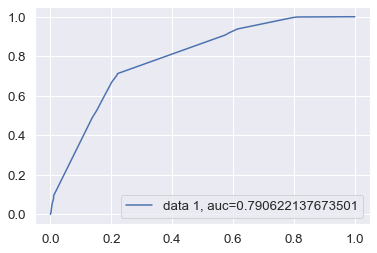

In [123]:
fpr, tpr, _ = metrics.roc_curve(y_clas_test.values,  LogReg.predict_proba(x_clas_test)[:,1])
auc = metrics.roc_auc_score(y_clas_test, LogReg.predict_proba(x_clas_test)[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

La **curva ROC-AUC** se utiliza para medir el rendimiento del modelo de clasificación, en donde, cuanto más cercano a 1 esté el AUC, mejor es nuestro clasificador para predecir las categorías. En este caso el **AUC** es de 0,79, lo cual indica que nuestro modelo es bueno para predecir si hubo o no movilidad educativa intergeneracional.

In [124]:
resultados = pd.DataFrame({'target':y_clas_test, 'proba_pred':LogReg.predict_proba(x_clas_test)[:,1]})

<Axes: xlabel='target', ylabel='proba_pred'>

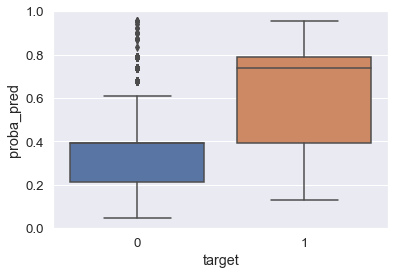

In [125]:
sns.boxplot(y='proba_pred', x='target', data=resultados)

In [126]:
brier_score_loss(resultados.target, resultados.proba_pred)

0.18299603717478477

La **puntuación de Brier** es una métrica que mide la precisión de las predicciones probabilísticas, en donde el cuanto menor sea la puntuación de Brier, mayor será la precisión de las predicciones. En este caso, el resultado de la puntuación es de 0,18 indicando que el modelo es precisio para predecir si hubo o no movilidad.

## Elección de los mejores hiper parámetros con GridSearchCV

In [129]:
# Definimos el espacio de búsqueda de los mejores hiper parámetros
param_grid = {'C': [10, 100],'penalty': ['l1', 'l2'],'solver': ['liblinear', 'saga']}

# Configurar la búsqueda en malla con validación cruzada
grid_search = GridSearchCV(LogReg, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en malla en los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en los datos de prueba: {accuracy:.4f}")

Mejores hiperparámetros: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy en los datos de prueba: 0.3570


Al comparar el accuracy obtenido a partir de la Regresión Logística y del Grid Search, se observa que el accuracy obtenido en este último es prácticamente la mitad del de la Regresión Logística.

## Validación Cruzada


In [130]:
# validaciones
kf = KFold(n_splits=10, shuffle=True, random_state=42)
loo = LeaveOneOut()
skf = StratifiedKFold(10)

In [131]:
# Entrenamos con K Folds y obtenemos como resultado el Accuracy
accuracy_kf = cross_val_score(linear_model.LogisticRegression(random_state= 42), x_clas, y_clas, cv= kf, scoring="accuracy")
print(f'Resultados para cada fold con K Folds: {accuracy_kf}')
print(f'KF Accuracy score: {"{:.3f}".format(accuracy_kf.mean())}')

Resultados para cada fold con K Folds: [0.72325976 0.73259762 0.73514431 0.72665535 0.74957555 0.73599321
 0.73831776 0.7357689  0.73237043 0.74681393]
KF Accuracy score: 0.736


In [132]:
# Entrenamos con Stratified K Folds y obtenemos como resultado el Accuracy
accuracy_skf = cross_val_score(linear_model.LogisticRegression(random_state= 42), x_clas, y_clas, cv= skf, scoring="accuracy")
print(f'Resultados para cada fold con Stratified K Folds: {accuracy_skf}')
print(f'SKF Accuracy score: {"{:.3f}".format(accuracy_skf.mean())}')

Resultados para cada fold con Stratified K Folds: [0.71052632 0.74023769 0.71222411 0.73429542 0.73174873 0.7385399
 0.73237043 0.7451147  0.77315208 0.73831776]
SKF Accuracy score: 0.736


En este caso, vemos que independientemente del método de validación cruzada que utilicemos, los resultados del Accuracy obtenidos son los mismos. Por lo que, utilizaremos el método K Folds para calcular otras métricas.

También es importante recalcar que se calculó el Accuracy para distintos valores de K, entre 2 y 500, y en todos los casos los resultados obtenidos fueron los mismos.

In [133]:
# Entrenamos con K Folds y obtenemos como resultado la precision
precision_kf = cross_val_score(linear_model.LogisticRegression(random_state= 42), x_clas, y_clas, cv= kf, scoring ='precision')
print(f'Resultados para cada fold con K Folds: {precision_kf}')
print(f'KF Precision score: {"{:.3f}".format(precision_kf.mean())}')

Resultados para cada fold con K Folds: [0.74499089 0.76623377 0.75797373 0.75868726 0.77483444 0.76109215
 0.79854809 0.77043478 0.77678571 0.7570922 ]
KF Precision score: 0.767


In [134]:
# Entrenamos con K Folds y obtenemos como resultado el recall
recall_kf = cross_val_score(linear_model.LogisticRegression(random_state= 42), x_clas, y_clas, cv= kf, scoring ='recall')
print(f'Resultados para cada fold con K Folds: {recall_kf}')
print(f'KF recall score: {"{:.3f}".format(recall_kf.mean())}')

Resultados para cada fold con K Folds: [0.68739496 0.68604651 0.68824532 0.66610169 0.74641148 0.72285251
 0.69073783 0.71221865 0.696      0.72619048]
KF recall score: 0.702


In [135]:
# Entrenamos con K Folds y obtenemos como resultado la precision
roc_auc_kf = cross_val_score(linear_model.LogisticRegression(random_state= 42), x_clas, y_clas, cv= kf, scoring ='roc_auc')
print(f'Resultados para cada fold con K Folds: {roc_auc_kf}')
print(f'KF ROC-AUC score: {"{:.3f}".format(roc_auc_kf.mean())}')

Resultados para cada fold con K Folds: [0.7688182  0.78293997 0.7846041  0.78355385 0.79755382 0.78301511
 0.79761033 0.77873758 0.78616522 0.79325041]
KF ROC-AUC score: 0.786


Si comparamos los resultados obtenidos al evaluar el modelo y los obtenidos a partir de la validación cruzada, vemos que son prácticamente iguales. Lo que indica que las métricas obtenidas son robustas y confiables sobre el rendimiento del modelo.

## 6.3. Conclusiones


Las métricas utilizadas para evaluar el modelo muestran que nuestro modelo de clasificación es preciso a la hora de predecir si el individuo experimentó o no movilidad educativa. Además, los resultados de la matriz de confusión muestran que el modelo predice correctamente un 37% que hay movilidad y un 37% de las veces que no hay movilidad; mientras que hay un 10% de **falsas alarmas** y un 16% de **sorpresas**.

## 7. Aprendizaje no supervisado: Análisis de Componentes principales (PCA)

In [136]:
# Definimos x e y
x_pca = EPH_reg.drop('EducHijos',axis = 1)
y_pca = EPH_reg['EducHijos']

In [137]:
# Dividimos los datos en train y test
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, test_size = 0.2, random_state = 0)

In [138]:
# Normalizamos los datos
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(EPH_reg), columns =EPH_reg.columns)
data = data.drop('EducHijos', axis = 1)

In [139]:
x_pca_train = sc.fit_transform(x_pca_train)
x_pca_test = sc.transform(x_pca_test)

In [140]:
# Aplicamos el PCA para reducir las dimensiones
pca = PCA()
x_pca_train = pca.fit_transform(x_pca_train)
x_pca_test = pca.transform(x_pca_test)

In [141]:
# Analizamos de la varianza explicada para cada componente
var_explicada = pca.explained_variance_ratio_
var_explicada

array([0.34917494, 0.1494475 , 0.12327769, 0.11075105, 0.09691951,
       0.08372937, 0.06479751, 0.01502735, 0.00652528, 0.0003498 ])

Los resultados obtenidos muestran que el *primer componente principal* explica el 34.92% de la varianza; mientras que el *segundo componente principal* explica el 14.94% de la variabilidad de los datos. Por lo que, en conjunto los dos primeros componentes principales explican el 49.86% (34.92% + 14.94%) de la variabilidad de los datos.

A continuación, con el comando *pca_components_* observamos los componenentes de la PCA, en donde las filas muestran las componentes principales (ordenadas de mayor a menor varianza explicada) y las columnas se corresponden con las variables de entrada.

In [142]:
pca.components_

array([[-1.65550007e-02, -4.81066545e-01,  4.80723364e-01,
        -2.24790155e-02, -5.15016192e-01,  5.17685151e-01,
         3.82397537e-02, -4.43895910e-02,  5.25016113e-03,
        -8.83451884e-04],
       [-5.26874392e-02, -1.75979846e-01, -1.56308036e-01,
        -4.50154787e-01,  7.64646657e-02,  3.86591930e-02,
         5.53366531e-01,  5.43359061e-01,  3.56200283e-01,
         5.92451373e-02],
       [-2.10593281e-01,  2.58442348e-01,  2.60884323e-01,
         6.87769918e-01,  4.22732512e-02,  5.86237141e-02,
         3.43526897e-01,  2.46568034e-01,  8.93152379e-02,
         3.94667492e-01],
       [-5.91939033e-01, -1.10810948e-01, -1.14643334e-01,
        -2.86987081e-01, -3.65193359e-02, -3.74417244e-02,
        -2.41679185e-01,  5.14611064e-02, -3.45999606e-01,
         5.98595097e-01],
       [ 6.03352977e-01, -1.96921551e-02,  4.92557104e-03,
        -1.08182223e-02, -1.36043870e-02,  1.84985691e-02,
         6.29545489e-02,  3.92867632e-01, -6.61197717e-01,
         1.

In [143]:
# Visualizamos los index de las columnas del df que utilizaremos
columnas_EPH_reg = EPH_reg.drop('EducHijos', axis = 1)
columnas_EPH_reg = columnas_EPH_reg.columns
columnas_EPH_reg

Index(['CH04', 'EducJefa', 'EducJefe', 'EducPadres', 'EdadJefa', 'EdadJefe',
       'EdadPadres', 'Edad', 'numhijos', 'P21'],
      dtype='object')

In [144]:
# Creamos un df con los datos obtenidos a partir del pca
componentes = pd.DataFrame(data = pca.components_, columns = columnas_EPH_reg, index = range(1,pca.components_.shape[0]+1))
componentes.head()

,CH04,EducJefa,EducJefe,EducPadres,EdadJefa,EdadJefe,EdadPadres,Edad,numhijos,P21
1,-0.016555,-0.481067,0.480723,-0.022479,-0.515016,0.517685,0.038240,-0.044390,0.005250,-0.000883
2,-0.052687,-0.175980,-0.156308,-0.450155,0.076465,0.038659,0.553367,0.543359,0.356200,0.059245
3,-0.210593,0.258442,0.260884,0.687770,0.042273,0.058624,0.343527,0.246568,0.089315,0.394667
4,-0.591939,-0.110811,-0.114643,-0.286987,-0.036519,-0.037442,-0.241679,0.051461,-0.346000,0.598595
5,0.603353,-0.019692,0.004926,-0.010818,-0.013604,0.018499,0.062955,0.392868,-0.661198,0.198540


Ahora podemoms analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

PC1 = -0.016555 * CH04 -0.481067 * EducJefa + 0.480723 * EducJefe + ...


En el siguiente headmap se puede observar la influencia de cada variable en los distintos componentes principales.

<Axes: >

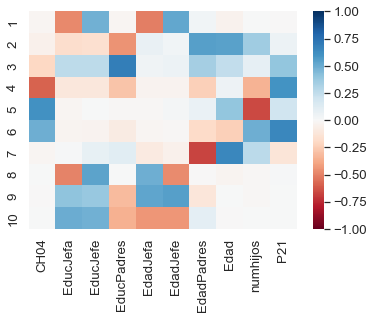

In [145]:
sns.heatmap(componentes, vmin=-1, vmax=1, cmap='RdBu')

El headmap indica que las principales variables que influyen en el primer componente principal son: EducJefe, EducJefa, EdadJefa y EdadJefe.

Una vez calculadas las componentes principales, se puede conocer la proporción de varianza explicada respecto al total y la proporción de varianza acumulada. Esta información está almacenada en el atributo explained_variance_ratio_ del modelo.

Text(0.5, 1.0, 'Propoción de la varianza explicada por cada componente principal')

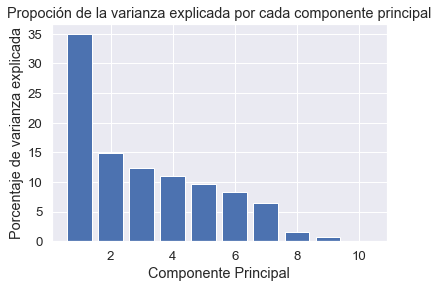

In [146]:
plt.bar(x=componentes.index, height = var_explicada*100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.title('Propoción de la varianza explicada por cada componente principal')

El gráfico anterior nos muestra que la primer componente principal es la que explica la mayor parte de la varianza (35%), mientras que el resto de las componentes explican el 15% o menos de la variabilidad de los datos.


(0.0, 105.0)

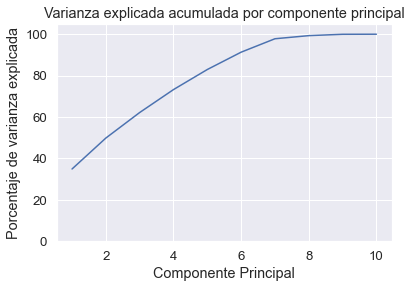

In [147]:
plt.plot(componentes.index,var_explicada.cumsum()*100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza explicada acumulada por componente principal')
plt.ylim(0,105)

El gráfica anterior nos muestra que las dos primeras componentes principales explican el 50% de la variabilidad de los datos, mientras que los 6 primeros componentes explican el 90% de la varianza.

A continuación se puede observar cuáles son las variables más importantes, es decir, cuáles son las variables que tienen los mayores loadings en las CP, indicando esto que explican una mayor parte de la varianza.

In [148]:
componentes.iloc[:10].abs().sum().sort_values()[::-1]

EducJefe      2.517138
EducJefa      2.479812
EdadPadres    2.328285
EducPadres    2.322960
EdadJefa      2.261769
numhijos      2.239538
EdadJefe      2.203238
Edad          2.193671
P21           2.045850
CH04          1.988749
dtype: float64

Como se puede observar las variables más importantes son "EducJefe" y "EducJefa". Sin embargo, se observa que el resto de las variables tienen loadings muy parecidos.

Ya que deseamos explicar al menos el 85% de nuestro modelo, utilizaremos las primeras seis componentes principales para realizar la función logística y ver qué tan bien funciona


In [149]:
# Aplicamos el PCA para reducir las dimensiones a 6
pca2 = PCA(n_components = 6)
x_pca_train2 = pca2.fit_transform(x_pca_train)
x_pca_test2 = pca2.transform(x_pca_test)

In [150]:
Reg_Log_pca2 = LogisticRegression(random_state = 0).fit(x_pca_train2,y_pca_train)

# Predecimos los valores del testing para la Regresión Logística
y_pca_pred2 = Reg_Log_pca2.predict(x_pca_test2)

# Hacemos la matriz de confusión
cm_pca = confusion_matrix(y_pca_test, y_pca_pred2)
cm_pca

array([[  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0, 104,
          0,   0,   1,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   2,
          0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   4,
          0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,
          0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
          0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  11,   0,   0,   0,   0,   0, 158,
          0,   0,   3,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,  40,
          0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  

Los insigths obtenidos a partir de la matriz de confusión nos indican que sólo hay tres errores, por lo que concluimos que la predicción es correcta utilizando 6 variables en vez de 10.  

Para obtener las nuevas variables se utiliza .transform y podemos seleccionamos las dos primeras componentes principales.

In [151]:
data_reducida=pca.transform(data)
columnas = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6']
data_reducida=pd.DataFrame(data_reducida[:,:6], columns = columnas)
data_reducida.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.801252,2.122937,-0.139013,0.154937,-0.199064,-1.189080
1,1.629026,-0.529833,-1.436307,0.900169,-0.408010,-0.902660
2,1.317369,0.811044,-2.110626,1.207798,-0.134794,-1.029710
3,2.104585,0.390246,-0.180107,-1.136711,1.009379,-0.362172
4,2.087929,0.594126,-0.087589,-1.117402,1.156792,-0.450320


## 8. Conclusiones

## 8.1. Resultados obtenidos y evaluación de los distintos modelos de Machine Learning

   
**Resultados obtenidos en el testing a partir de la Regresión**

|Métrica|Regresión Lineal|Regularización L1|Regularización L2|K Folds|Árbol de decisión para regresión|
|---|---|---|---|---|---|
|**Coeficiente de determinación**|0,217|0,217|0,217|0,207|0,162|
|**Error cuadrático medio**|12,445|12,445|12,445|13,46|13,31|



Los resultados obtenidos muestran que el modelo de regresión lineal (utilizando o no la regularización) permite predecir con bastante exactitud el nivel educativo que alcanzarán los hijos, dado el nivel educativo de los padres, es decir, que es una herramienta que permite predecir la MEI en Argentina. También se puede afirmar que en los años 2021-2022 ha habido MEI en Argentina, esto quiere decir que los resultados educativos de los hijos están altamente condicionados por el logro educativo de su padre o madre y, además, que los individuos que nacieron en familias con bajos niveles educativos tienen pocas posibilidades de tener en el futuro el mismo nivel de vida o estatus socioeconómico que los que nacieron en familias ricas.

Además, se observa que el modelo de regresión lineal tiene una mejor performance que K Folds y el árbol de decisión para regresión. 


**Resultados obtenidos en el testing a partir del modelo de Clasificación**

|Métrica|Regresión Logística|K Folds|
|---|---|---|
|**Accuracy**|0,740|0,740|
|**Precision**|0,780|0,77|
|**Recall**|0,703|0,70|
|**Especificidad**|0,781|-|
|**ROC-AUC**|0,790|0,79|

Al comparar los resultados obtenidos por medio de la regresión logística y del K Folds se observa que las performances de ambos modelos son similares, en donde las métricas obtenidas indican que los modelos son buenos para predecir cuando un hijo experimentará o no MEI, con un porcentaje de acierto del 74% (Accuracy). 

## 8.2. Respuestas a las preguntas planteadas



*  _¿Cuántos padres e hijos completaron cada nivel educativo?_

    Se observó que la mayoría de los padres ha completado o la primaria o la secundaria, mientras que la mayoría de los hijos completó la secundaria.
    
    

* _¿Cuáles son los factores que influyen en el nivel educativo de una persona?_

    Los principles factores que influyen en el nivel educativo alcanzado por los hijos son:
    - La **educación de los padres** con una fuerte correlación positiva.
    - El **sexo** que tiene una débil relación positiva
    - La **edad** con una débil correlación negativa.
    - El resto de las variables tiene una correlación inferior al 0.10 en valor absoluto.


* _¿Existe una relación entre el nivel educativo alcanzado por un hijo y el de sus padres? En caso de que exista una relación, ¿cómo es esa relación?_

    La educación del padre y del hijo están fuertemente correlacionados, siendo una relación positiva. Esto indica que cuanto mayor es el nivel educativo alcanzado por los padres, mayor será el nivel educativo del hijo.



* _¿Cuál es la movilidad intergeneracional educativa de los hijos encuestados en 2021 y 2022?_

    El 51,71% de los hijos encuestados ha alcanzado más años de educación que su padre/madre. Lo cual muestra que durante el periodo 2021-2022 ha habido movilidad educativa intergeneracional.




* _¿El nivel educativo del jefe o jefa de hogar tienen la misma relación con el nivel educativo alcanzado por el hijo?_

    El nivel educativo del jefe y jefa de hogar tienen un efecto positivo, pero el efecto de la educación del padre sobre la educación de los hijos es mayor que el de la educación de la madre.


El análisis exploratorio de datos y los modelos de machine learning aplicados en este proyecto proporcionan una valiosa herramienta para la predicción de la movilidad educativa intergeneracional en Argentina. Identificar y abordar los factores que influyen en la MEI puede ayudar a los agentes políticos y económicos a aplicar medidas que permitan aumentar la MEI, especialmente en los estratos sociales más bajos, disminuyendo así la desigualdad.


Por último, este trabajo queda abierto a futuros proyectos de *data science* en donde se podría comparar la MEI de distintos países de América Latina o de las distintas provincias de Argentina. También una de las próximas preguntas a examinar se relaciona con otros factores que pueden explicar posibles cambios de la MEI a través del tiempo.  